In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from stats import *

# Chapter 5: Probability Distributions

__Probability__ takes on a value from 0 to 1, with a probability $P(X) = 0$ for an event meaning that the stated condition - e.g., a standard 6 sided die will yield a 7 when rolled -  would never occur in an infinite number of flips. A probability of 0.5 means that in a sufficiently large number of trials, approximately half of the trials would result in the stated condition. A probability of 1 means all trials would result in the stated condition so that the number of successes in a trial would be equal to the number of attempts. 

__Probability Distributions__ display all of the possible values that a _random variable_ $X$ could take on on the x-axis, and the corresponding probability of that value on the y-axis. Hence, the area under the probability distribution will always be equal to one. 
   - The random variable $\bar{X}$, which represents the the mean of a sample drawn from a larger population, defines a _**sampling distribution**_, which gives all values possible for $\bar{X}$, $\bar{X_i}$, and the probability of that value occuring. $\bar{X}$ can take on values falling on its sampling distribution, which describe the likelihood of getting a given mean for a given sample size.  This sampling distribution takes on a standard deviation of $\frac{S}{\sqrt(n)}$, otherwise known as the **standard error.** 

Distributions can be described by: 
- Their mean, $\mu$(or $\bar{X}$ for sampling distributions), which is the average value of the dataset.  
- Their standard deviation, $\sigma$, which determines how flat the curve is, and how densely the data clusters around the mean(SE for sampling distributions).
- Skewness, $S_{KP}$, which refers to a distortion or asymmetry of a distribution. 
- Kurtosis, $k$, which describes how much of the distribution lays in its tails. 

### Types of Probability Distributions
#### Normal Distributions
Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science and often used when modeling economic phenomena. You will encounter it in predictive models you create. It is one of the assumptions of many statistical techniques.

A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical(skewness of 0), centered about its mean, with its spread determined by its standard deviation. Data near the mean - e.g., $\sigma < 1$ - are more frequent in occurrence than data far from the mean - e.g., $\sigma > 2$. 


A random variable $X$ which follows a normal distribution with mean $\mu$ and standard deviation $\sigma$ and has this density function: 
<h3 align="center">
    <font size="4">
        $ X = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $
    </font>
    </h3> 
    
If one knew the mean and standard deviation of a particular distribution, it would be possible to estimate the probability of drawing a value from a particular range - e.g., $a \leq X \leq b$ - by taking the definite integral of this function: 
<h3 align="center">
    <font size="4">
        $\int_{a}^{b}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}dx$.
    </font>
</h3>

#### Standard Normal Distribution

The standardized normal distribution is the most important member of the family of normal probability distributions—the one with $\mu = 0$  and $\sigma = 1$. The normal random variable distributed according to the standard normal distribution is called the standard normal variable and is denoted by $Z$. It represents the number of standard deviations a given point X lies from the mean of the standard normal distribution.  It is expressed as
<h3 align="center">
    <font size="4">
        $ Z =  \frac{X-\mu}{\sigma}$
    </h3> 

A key feature of all normal distributions is that, using the equation above, they can be transformed to be analyzed using the standard normal distribution.
    
_If you divide any normal distribution by its standard deviation(normalizing the SD to be 1), that normal distribution becomes the standard normal distribution._

In [2]:
def normal_dist(mean, sd, x = np.linspace(-10, 10, 1000)):
    prob_density = (1 / (sd * (2 * np.pi) ** (0.5)) ) * np.exp(
        -0.5*((x-mean)/sd)**2)
    return prob_density

In [3]:
normal_dist_list = normal_dist(mean = 0, sd = 1)

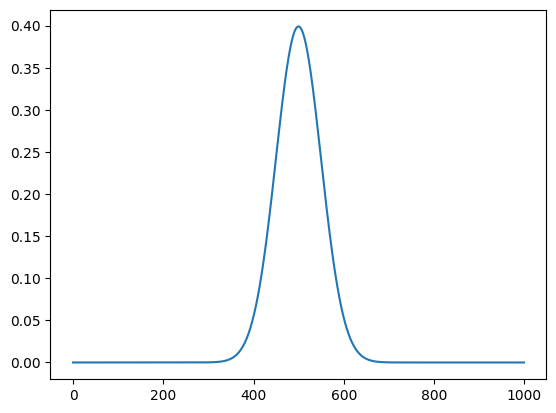

In [4]:
plt.plot(normal_dist_list)

Text(0.5, 1.0, '$\\mu$ = 0\t$\\sigma_1$ = 1\t$\\sigma_2$ = 2\t$\\sigma_3$ = 3\t')

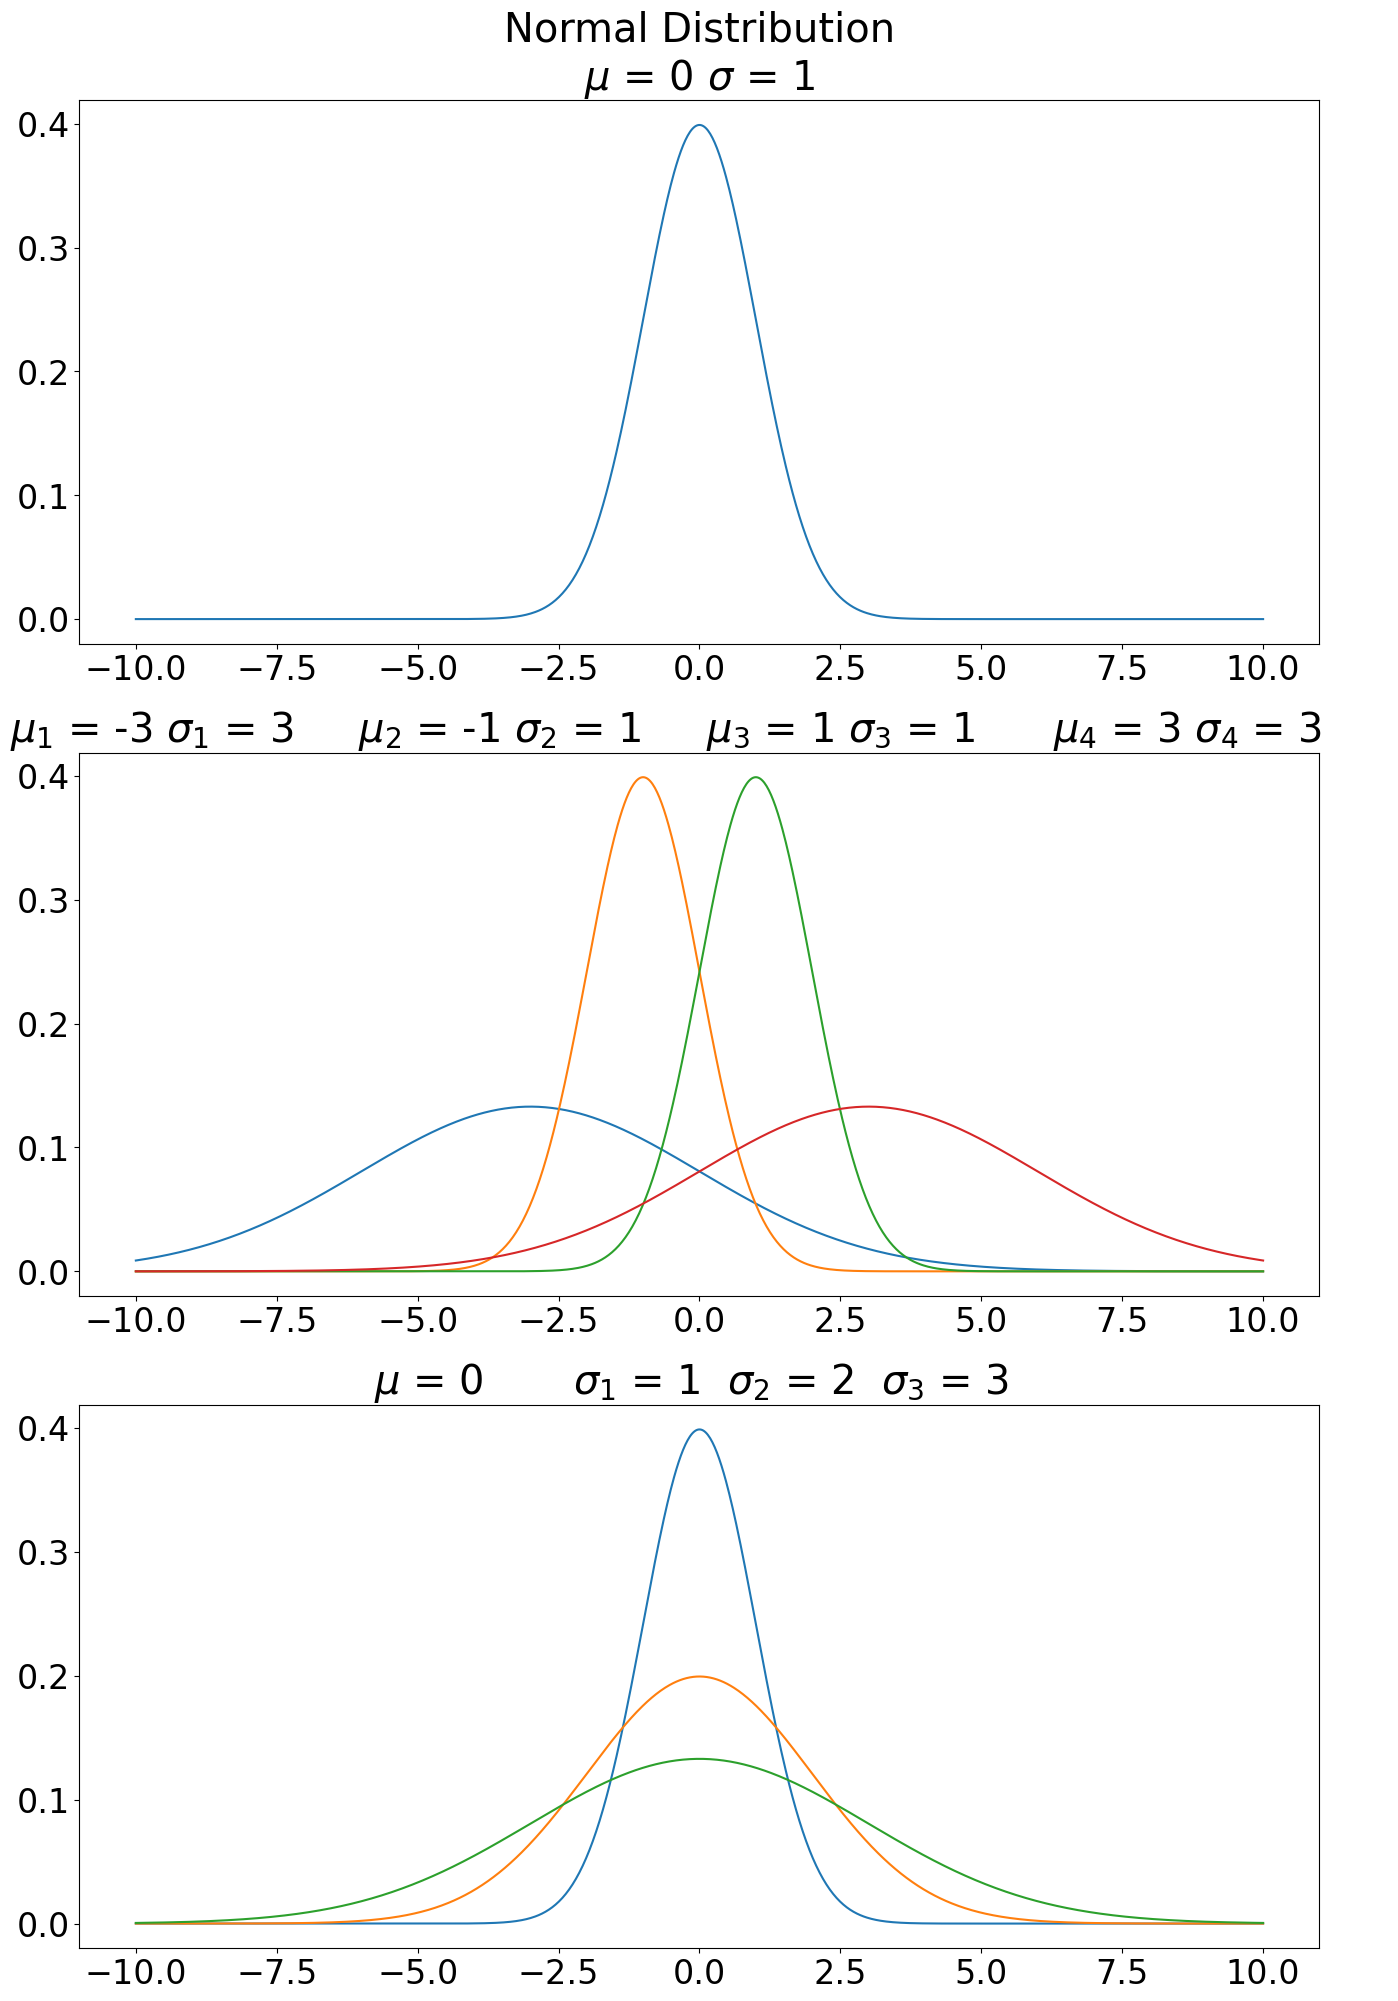

In [5]:
plt.rcParams.update({"font.size":24})

fig, axs = plt.subplots(3, 1, figsize = (16, 24))
x = np.linspace(-10, 10, 1000)
mean = 0
sd = 1
normal_dist_list = normal_dist(mean = mean, sd = sd)
axs[0].plot(x, normal_dist_list)
axs[0].set_title("Normal Distribution\n$\mu$ = " + \
                str(mean) + " $\sigma$ = " + str(sd))
ax1_title = ""
ax1_sub = 0
for mean_ in range(-3,4,2):
    sd = abs(mean_)
    normal_dist_list = normal_dist(mean = mean_, sd = sd)
    axs[1].plot(x, normal_dist_list)
    ax1_sub += 1
    ax1_title = ax1_title + "$\mu_" + str(ax1_sub) + "$ = " + str(mean_) + " "
    ax1_title = ax1_title + "$\sigma_" + str(ax1_sub) + "$ = " + str(sd) + "\t"
axs[1].set_title(ax1_title)

ax2_title = "$\mu$ = 0\t"
ax2_sub = 0
for sd in range (1,4):
    mean = 0
    ax2_sub += 1
    normal_dist_list = normal_dist(mean = mean, sd = sd)
    axs[2].plot(x, normal_dist_list)
    ax2_title = ax2_title + "$\sigma_" + str(ax2_sub) + "$ = " + str(sd) + "\t"
axs[2].set_title(ax2_title)

In [6]:
def create_lognormal(mean, sd, x = np.linspace(0, 10, 1000)):
    density_points = (1 / x * sd * np.sqrt(2 * math.pi)) * math.e ** ( -(np.log(x) - mean) ** 2 / (2 * sd ** 2))
    return density_points

Text(0.5, 1.0, 'Lognormal Distribution with μ = 0 and σ = 1')

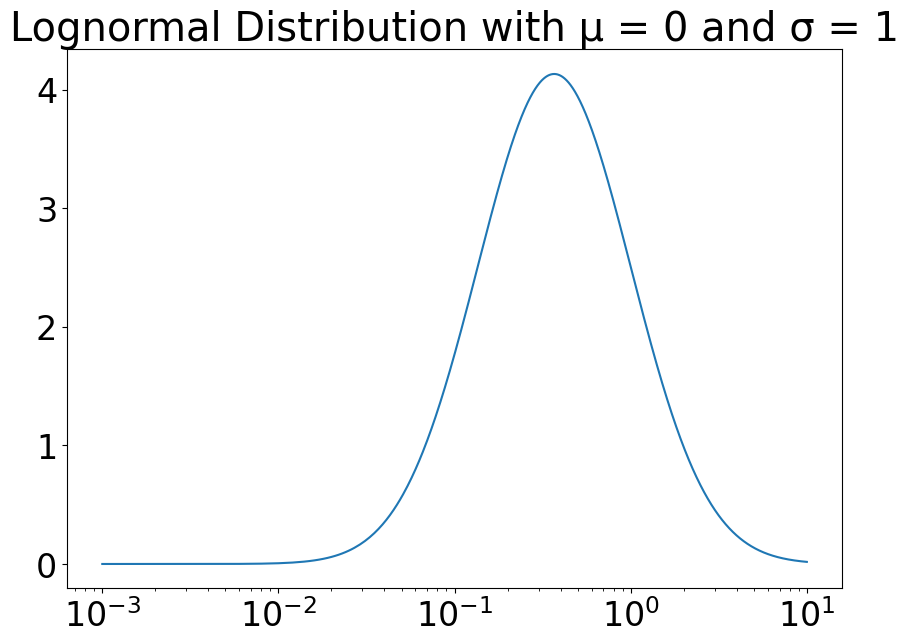

In [7]:
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(10, 7))
x = np.linspace(0, 10, 10000)
mean = 0
sd = 1
lognorm = create_lognormal(mean, sd,x)
ax.plot(x, lognorm)
plt.xscale("log")
ax.set_title("Lognormal Distribution with μ = " + str(mean) + " and σ = " + str(sd))

### Binomial Distribution
If $X$ is a random variable that yields the number of successess seen in the trials of a binomial(yes or no) experiment, then we say that $X$ follows a binomial distribution.

We are interested in finding the probability that some particular number of successes is seen in the course of that binomial experiment.

- $n$ = the number of trials
- $x$ = some number of successes, with $0≤x≤n$
- $p$ = the probability of success on any one trial
- $q$ = $1−p$ = the probability of failure on any one trial

A binomial trial can result in a success with probability $p$ and a failure with probability $q = 1−p$. Then the probability distribution of the binomial random variable $X$, the number of successes in $n$ independent trials, is
<h3 align="center">
    <font size="4">
        $b(x; n, p) = {n \choose x}p^xq^{n-x}$
    </font>
    </h3> 

Where  $x = 0, 1, 2,..., n$ and ${n \choose x}=\frac{n!}{x!(n-x)!}$

The most common example is flipping a coin, which can be modeled as $x=$ the number of "heads" or "tails" in $n$ trials. The probability of success and failure is 0.5. 

The mean $\mu$ and standard deviation $\sigma$ for a binomial distribution $b(x; n, p)$ are
- $\mu = np$
- $\sigma = \sqrt{np(1-p)}$

We define and graph the binomial distribution for various x, p, and n values. 

As an example of the binomial distribution, we can think of the top hedge funds in the stock market. If we assume that the markets are efficient and any given mutual fund only has a 50% probability of beating the market in every year, if there is a large $n$, or a large number of firms, many of them will survive for many years, just by chance. This example is demonstrated wonderfully in Burton Malkiel's *A Random Walk Down Wallstreet* in which he describes a coin flipping contest of 1000 people, which guarantees that multiple people will win more than 10 rounds simply by chance, and then become world-renouned as amazing coin-flippers. 

- How many funds will 'beat' an efficient market for more than 10 years if there are 1000 funds to start? We will find the probability of a single fund beating the market for that long and then multiply that by 1000 funds. 

- $ = P(1) = {10 \choose 1}0.5^{1}0.5^{10-1} = 0.0097$, so there is a 0.97% chance of a single fund beating an efficient market for 10 years, and we can reasonably expect that 97 funds will beat the market for 10 years if 100 start, just by chance. 

In [8]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

In [9]:
def binomial(x, n, p):
    q = 1 - p
    return float(math.factorial(n)) / (math.factorial(x) * math.factorial(n - x)) * p ** x * (q) ** (n - x)

In [10]:
binomial(x = 50, n = 100, p = 0.5)

0.07958923738717875

In [11]:
def probability_of_outcome(X0, X1, p, n):
    P = 0
    for x in range(X0, X1 + 1):
        P += binomial(x = x, n = n, p = p)
    return P
probability_of_outcome(40, 60, 0.5, 100)

0.9647997997822952

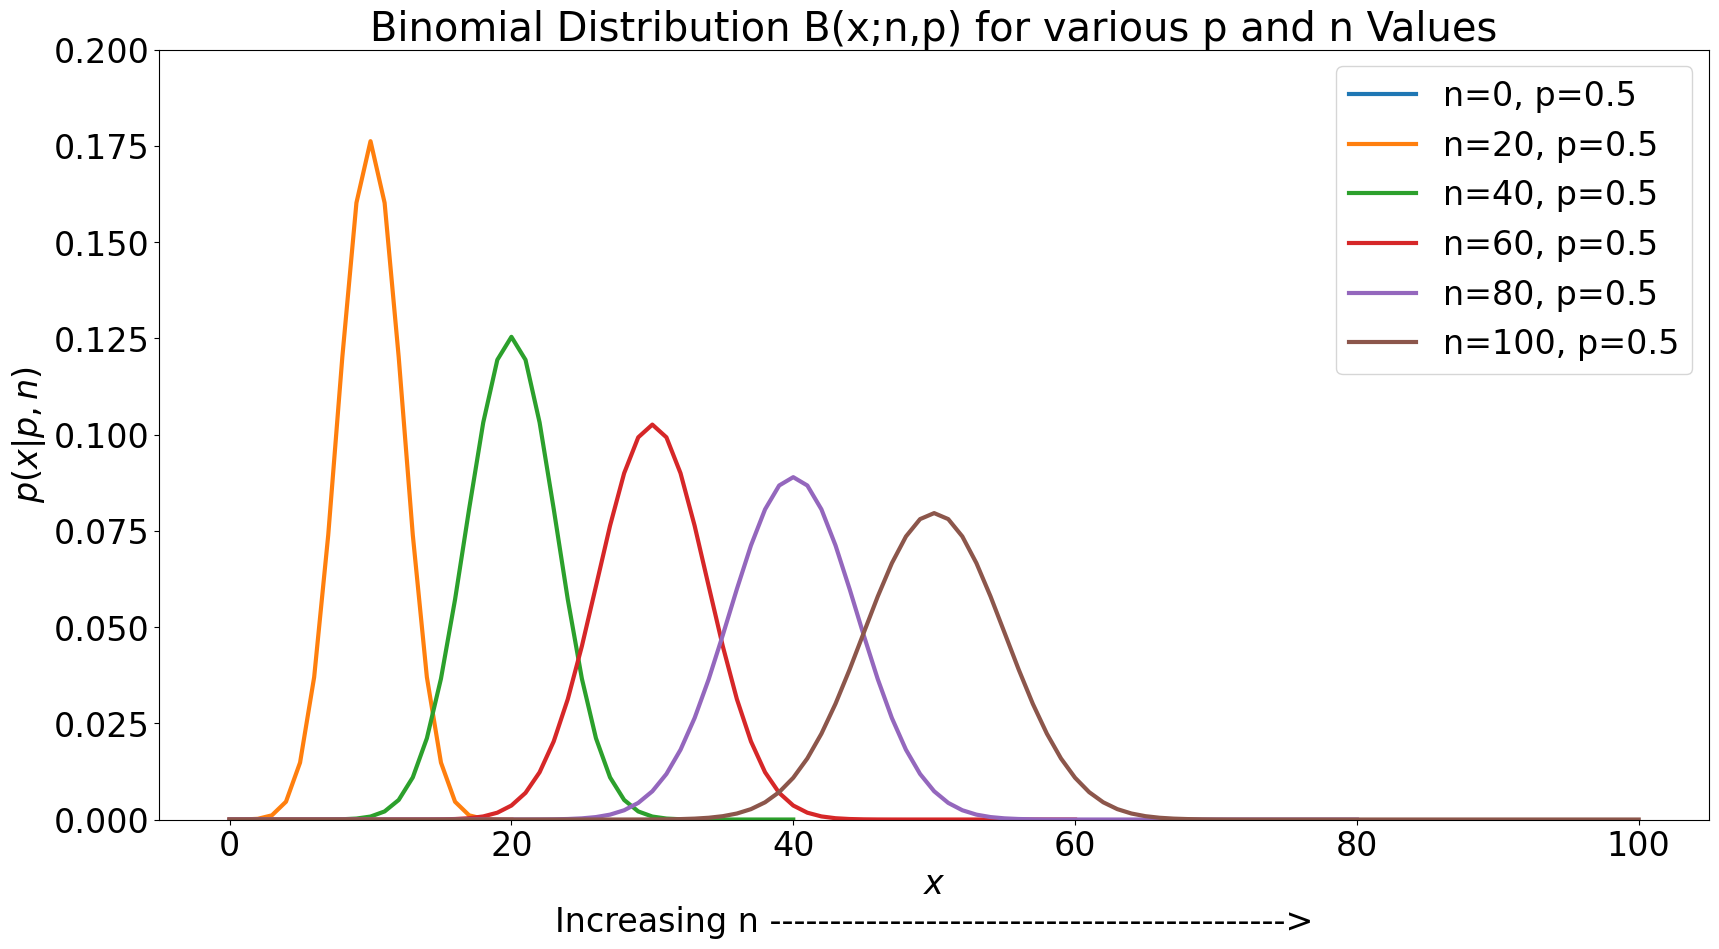

In [12]:
fig, ax = plt.subplots(figsize = (20,10))
cmap = cm.get_cmap("Blues")

p = 0.5
ymax = binomial(20 * p, 20, p)
for n in range(0, 101, 20):
    #x = int(n * p)
    binom_vars = [binomial(x, n, p) for x in range(n+1)]
    plt.plot(binom_vars, linewidth = 3, label = f"n={n}, p={p}")
ax.set_ylim(ymin = 0, ymax = 0.2)

plt.xlabel("$x$\nIncreasing n ------------------------------------------->",
           fontsize=24)
plt.ylabel("$p(x | p, n)$", fontsize=24)
plt.title("Binomial Distribution B(x;n,p) for various p and n Values")
plt.legend()
plt.show()

## Poisson Distribution

The Poisson probability distribution applies to many random phenomena occurring during a period of time- for example, the number of faulty products coming off an assembly line in a day or week. It also applies to spatial phenomena such as, for example, the number of typing errors on a page.

A Poisson random variable is a discrete variable that can take on any integer value from zero to infinity. The value gives the number of occurrences of the circumstance of interest during a particular period of time or within a particular spatial area. A unit probability mass is assigned to this sample space. Our concern is then with the probability that there will be, for example, zero, one, two, three, etc., calls to the police during a particular time period on a typical day, or that in typing this chapter I will make zero, one, two, etc. errors on a particular page.

**The Poisson probability function is**

<h3 align="center">
    <font size="4">
        $ P(x) = \frac{\lambda^xe^{-\lambda}}{x!}$
    </font>
    </h3> 
    
where 
- $\lambda$ = the expected mean of x over many trials

- $x$ is the number of occurences that actually happen
      
- $P(X)$ is the probability that x would equal a given x value

The poisson tells us: what is the probability of x occurences happening in a timeframe when the expected number of occurrences is $\lambda$?

For example - what is the probability of 10 people quitting from your company this year when the average has historically been 5?
-  $ P(10) = \frac{5^{10}e^{-5}}{10!} = ~0.018$

- There is a 1.8% chance that 10 or more employees quit this year. 

In [13]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import yfinance as yf

In [14]:
yf.pdr_override()
start = datetime.datetime(2012,1,1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["MSFT", "AAPL", "PG", "TSLA"]
for stock in stocks:
    data_dict[stock] = web.get_data_yahoo(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [15]:
data_dict["MSFT"]

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   26.549999   26.959999   26.389999   26.770000   21.413067   
2012-01-04   26.820000   27.469999   26.780001   27.400000   21.917002   
2012-01-05   27.379999   27.730000   27.290001   27.680000   22.140970   
2012-01-06   27.530001   28.190001   27.530001   28.110001   22.484921   
2012-01-09   28.049999   28.100000   27.719999   27.740000   22.188957   
...                ...         ...         ...         ...         ...   
2023-03-21  274.880005  275.000000  269.519989  273.779999  273.779999   
2023-03-22  273.399994  281.040009  272.179993  272.290009  272.290009   
2023-03-23  277.940002  281.059998  275.200012  277.660004  277.660004   
2023-03-24  277.239990  280.630005  275.279999  280.570007  280.570007   
2023-03-27  280.500000  281.459991  275.519989  276.380005  276.380005   

              Volume  
Date                  
2012-01-03  64731500  
2012-01-04  80516100  
2012-01-05  56081400  
2012-01-06  99455500  
2012-01-09  59706800  
...              ...  
2023-03-21  34558700  
2023-03-22  34873300  
2023-03-23  36610900  
2023-03-24  28172000  
2023-03-27  26808900  

[2826 rows x 6 columns]

# Create a Dataframe w/ Close Data for All Stocks

In [16]:
close_data = pd.concat([df["Close"] for df in data_dict.values()], 
                       keys = data_dict.keys(),
                       axis = 1)
close_data

MSFT        AAPL          PG        TSLA
Date                                                      
2012-01-03   26.770000   14.686786   66.830002    1.872000
2012-01-04   27.400000   14.765714   66.800003    1.847333
2012-01-05   27.680000   14.929643   66.519997    1.808000
2012-01-06   28.110001   15.085714   66.360001    1.794000
2012-01-09   27.740000   15.061786   66.639999    1.816667
...                ...         ...         ...         ...
2023-03-21  273.779999  159.279999  144.080002  197.580002
2023-03-22  272.290009  157.830002  143.990005  191.149994
2023-03-23  277.660004  158.929993  143.789993  192.220001
2023-03-24  280.570007  160.250000  146.720001  190.410004
2023-03-27  276.380005  158.279999  145.949997  191.809998

[2826 rows x 4 columns]

In [17]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Daily Stock Price')

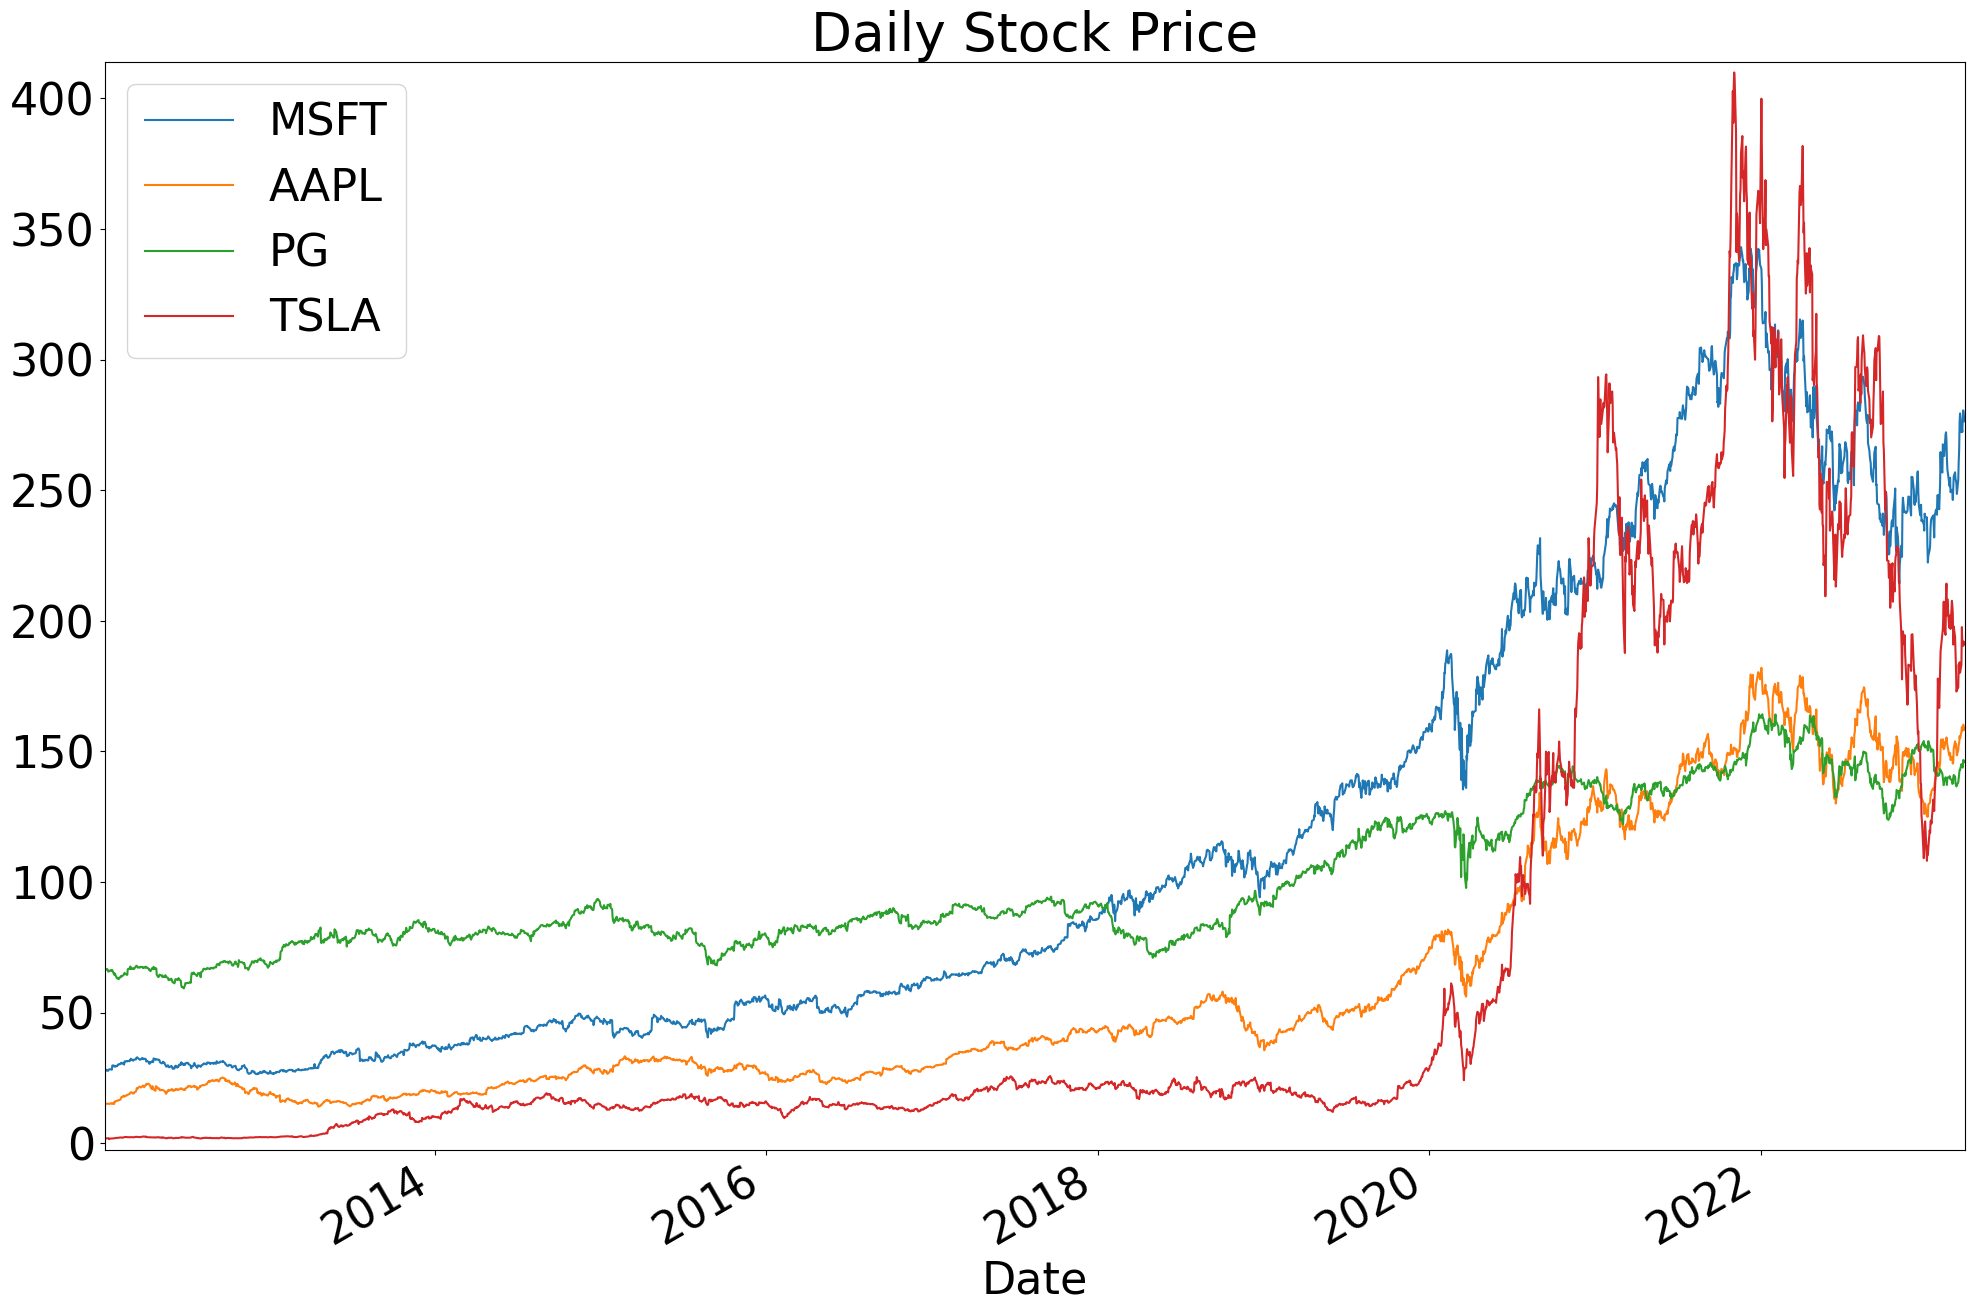

In [18]:
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0.01
plt.rcParams.update({"font.size": 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
ax.set_title("Daily Stock Price")

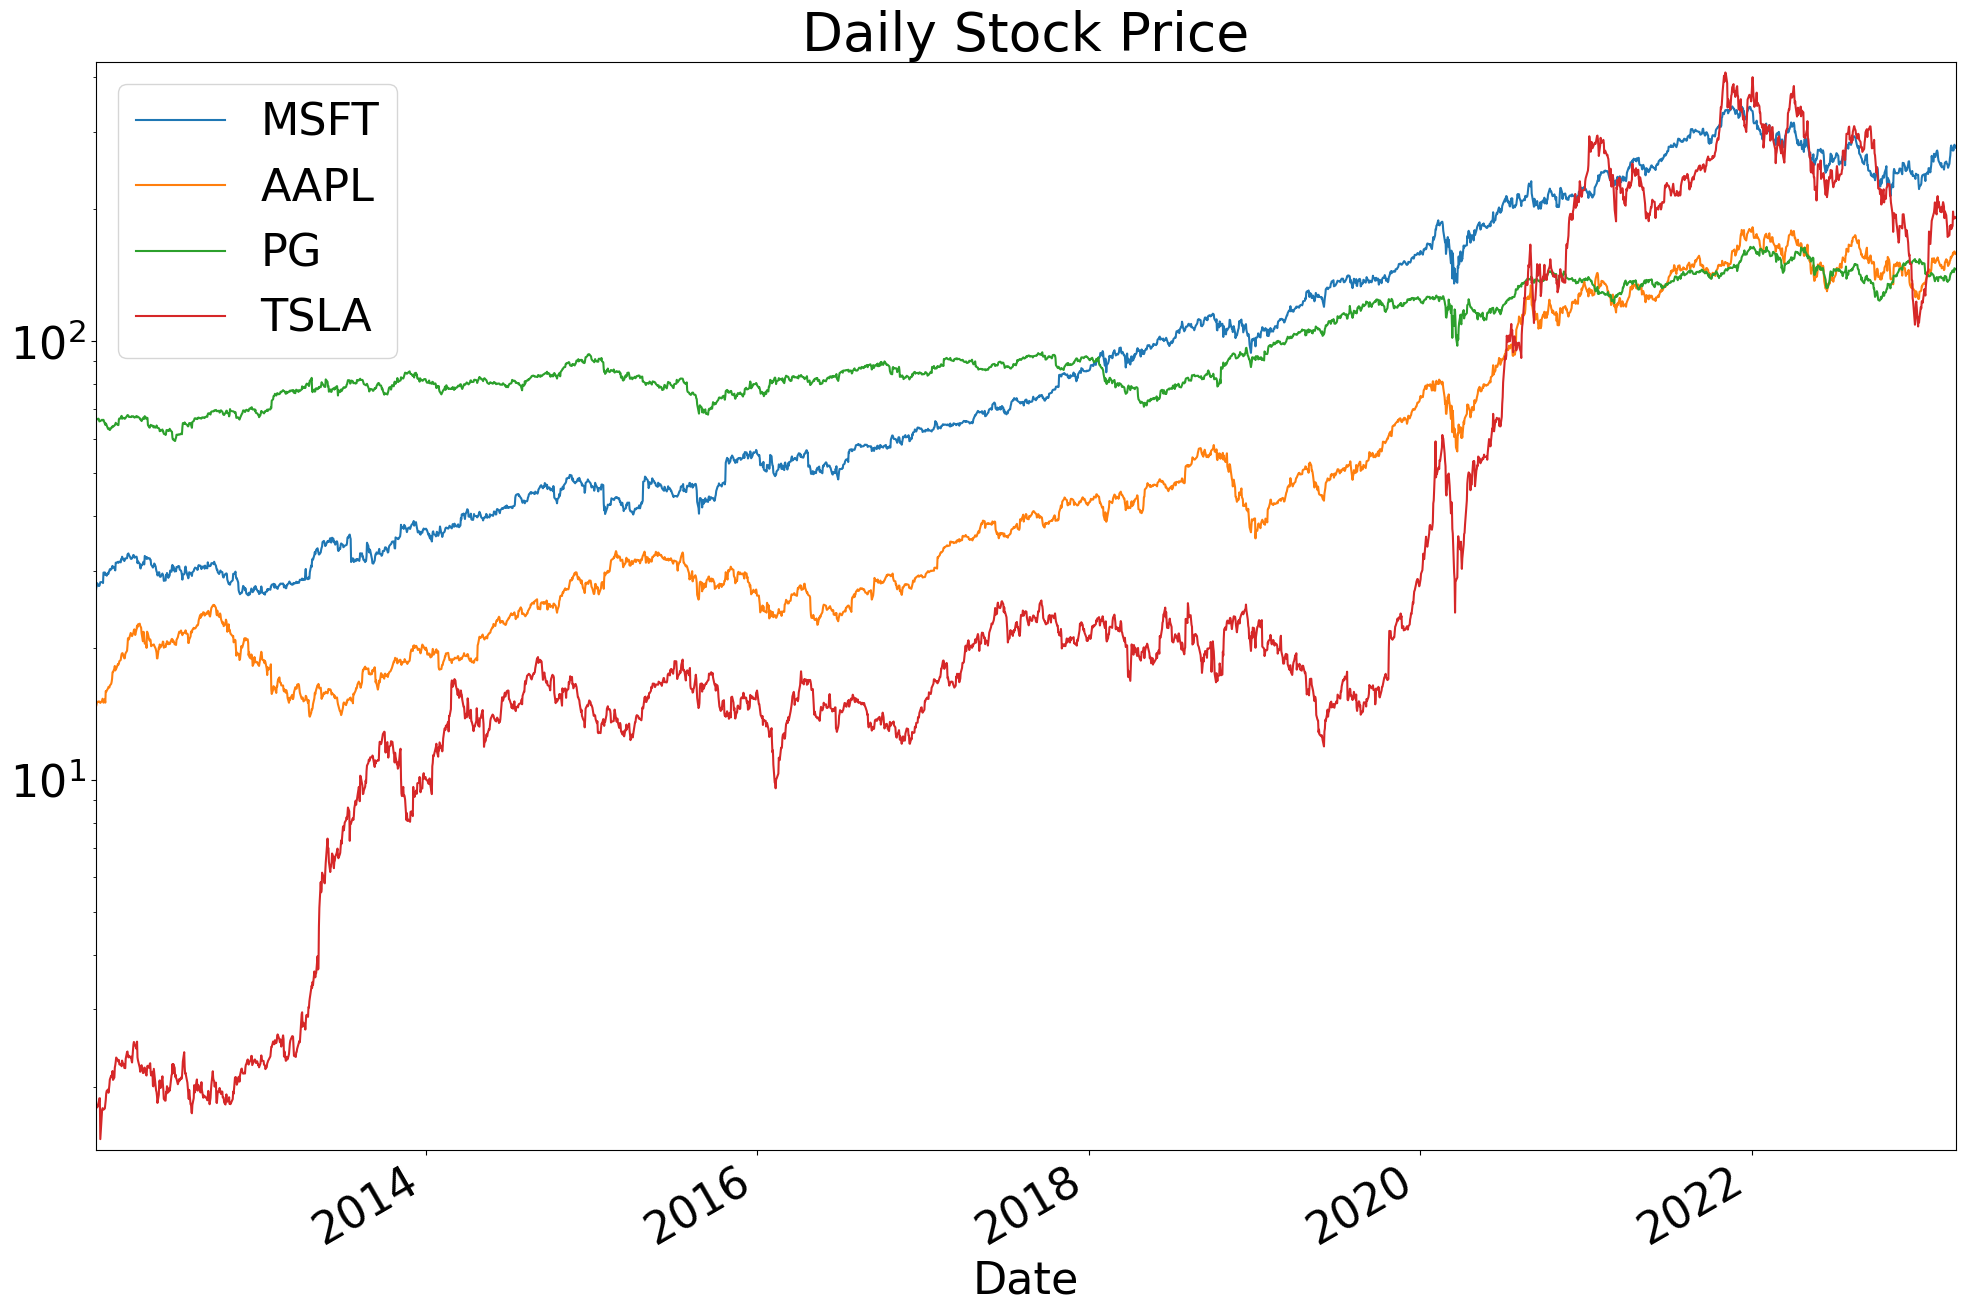

In [19]:
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
ax.set_title("Daily Stock Price")
ax.set_yscale("log")

Text(0.5, 1.0, 'AAPL')

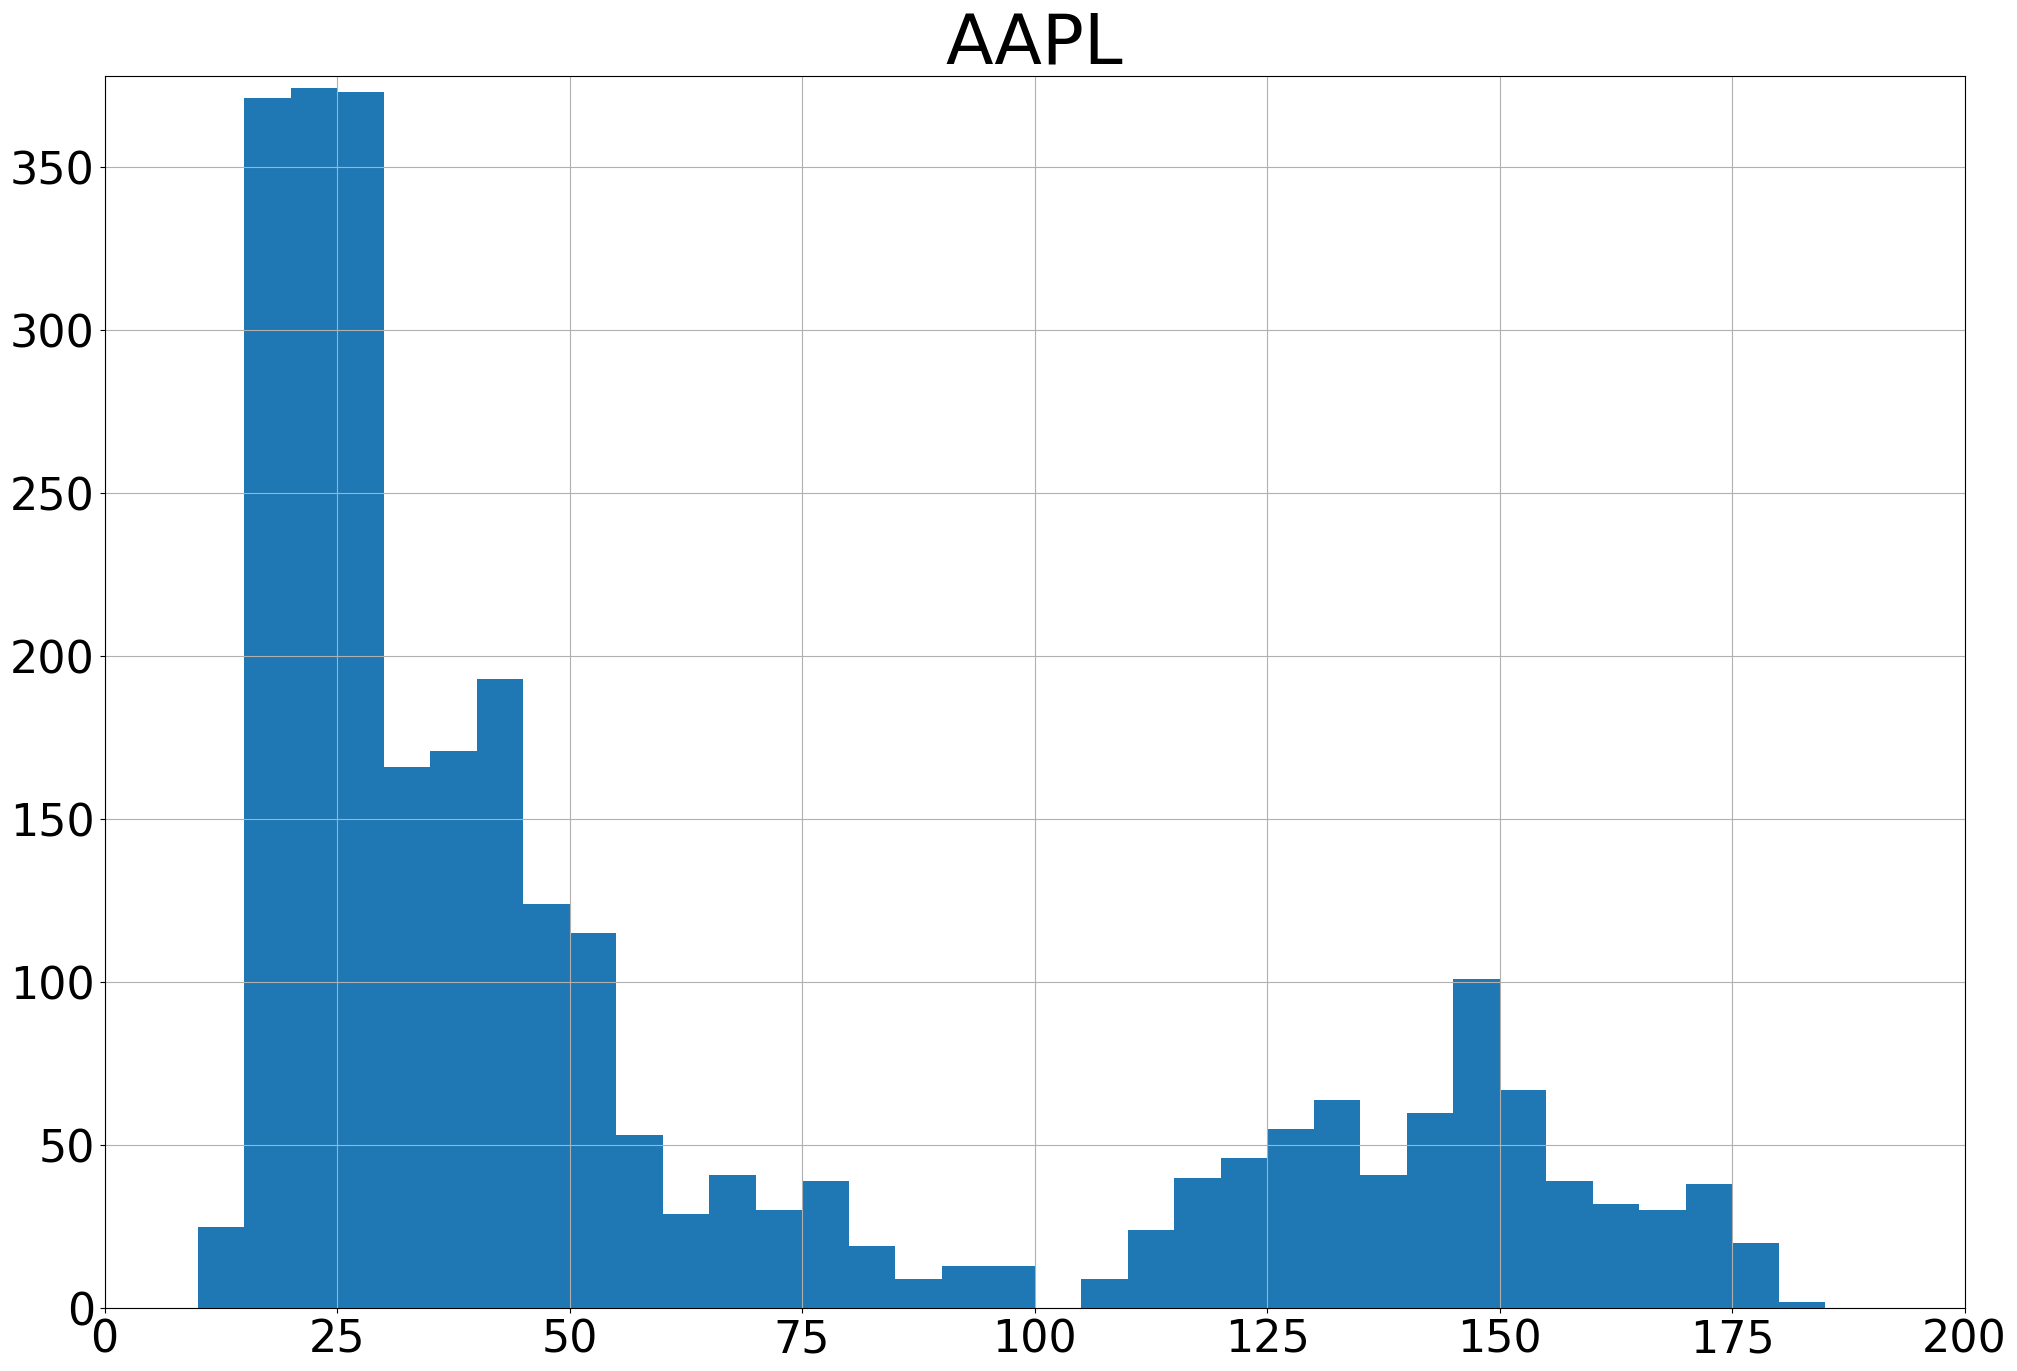

In [20]:
fig, ax = plt.subplots(figsize = (24,16))
close_data["AAPL"].hist(bins = [i for i in range(0, 201, 5)])
ax.set_title("AAPL", fontsize = 50)

In [21]:
log_data = np.log(close_data)
log_data

MSFT      AAPL        PG      TSLA
Date                                              
2012-01-03  3.287282  2.686948  4.202152  0.627007
2012-01-04  3.310543  2.692308  4.201703  0.613743
2012-01-05  3.320710  2.703349  4.197503  0.592221
2012-01-06  3.336125  2.713748  4.195094  0.584448
2012-01-09  3.322875  2.712161  4.199305  0.597003
...              ...       ...       ...       ...
2023-03-21  5.612325  5.070664  4.970369  5.286144
2023-03-22  5.606868  5.061519  4.969744  5.253058
2023-03-23  5.626397  5.068464  4.968354  5.258641
2023-03-24  5.636823  5.076735  4.988526  5.249180
2023-03-27  5.621777  5.064366  4.983264  5.256505

[2826 rows x 4 columns]

Text(0.5, 1.0, 'AAPL')

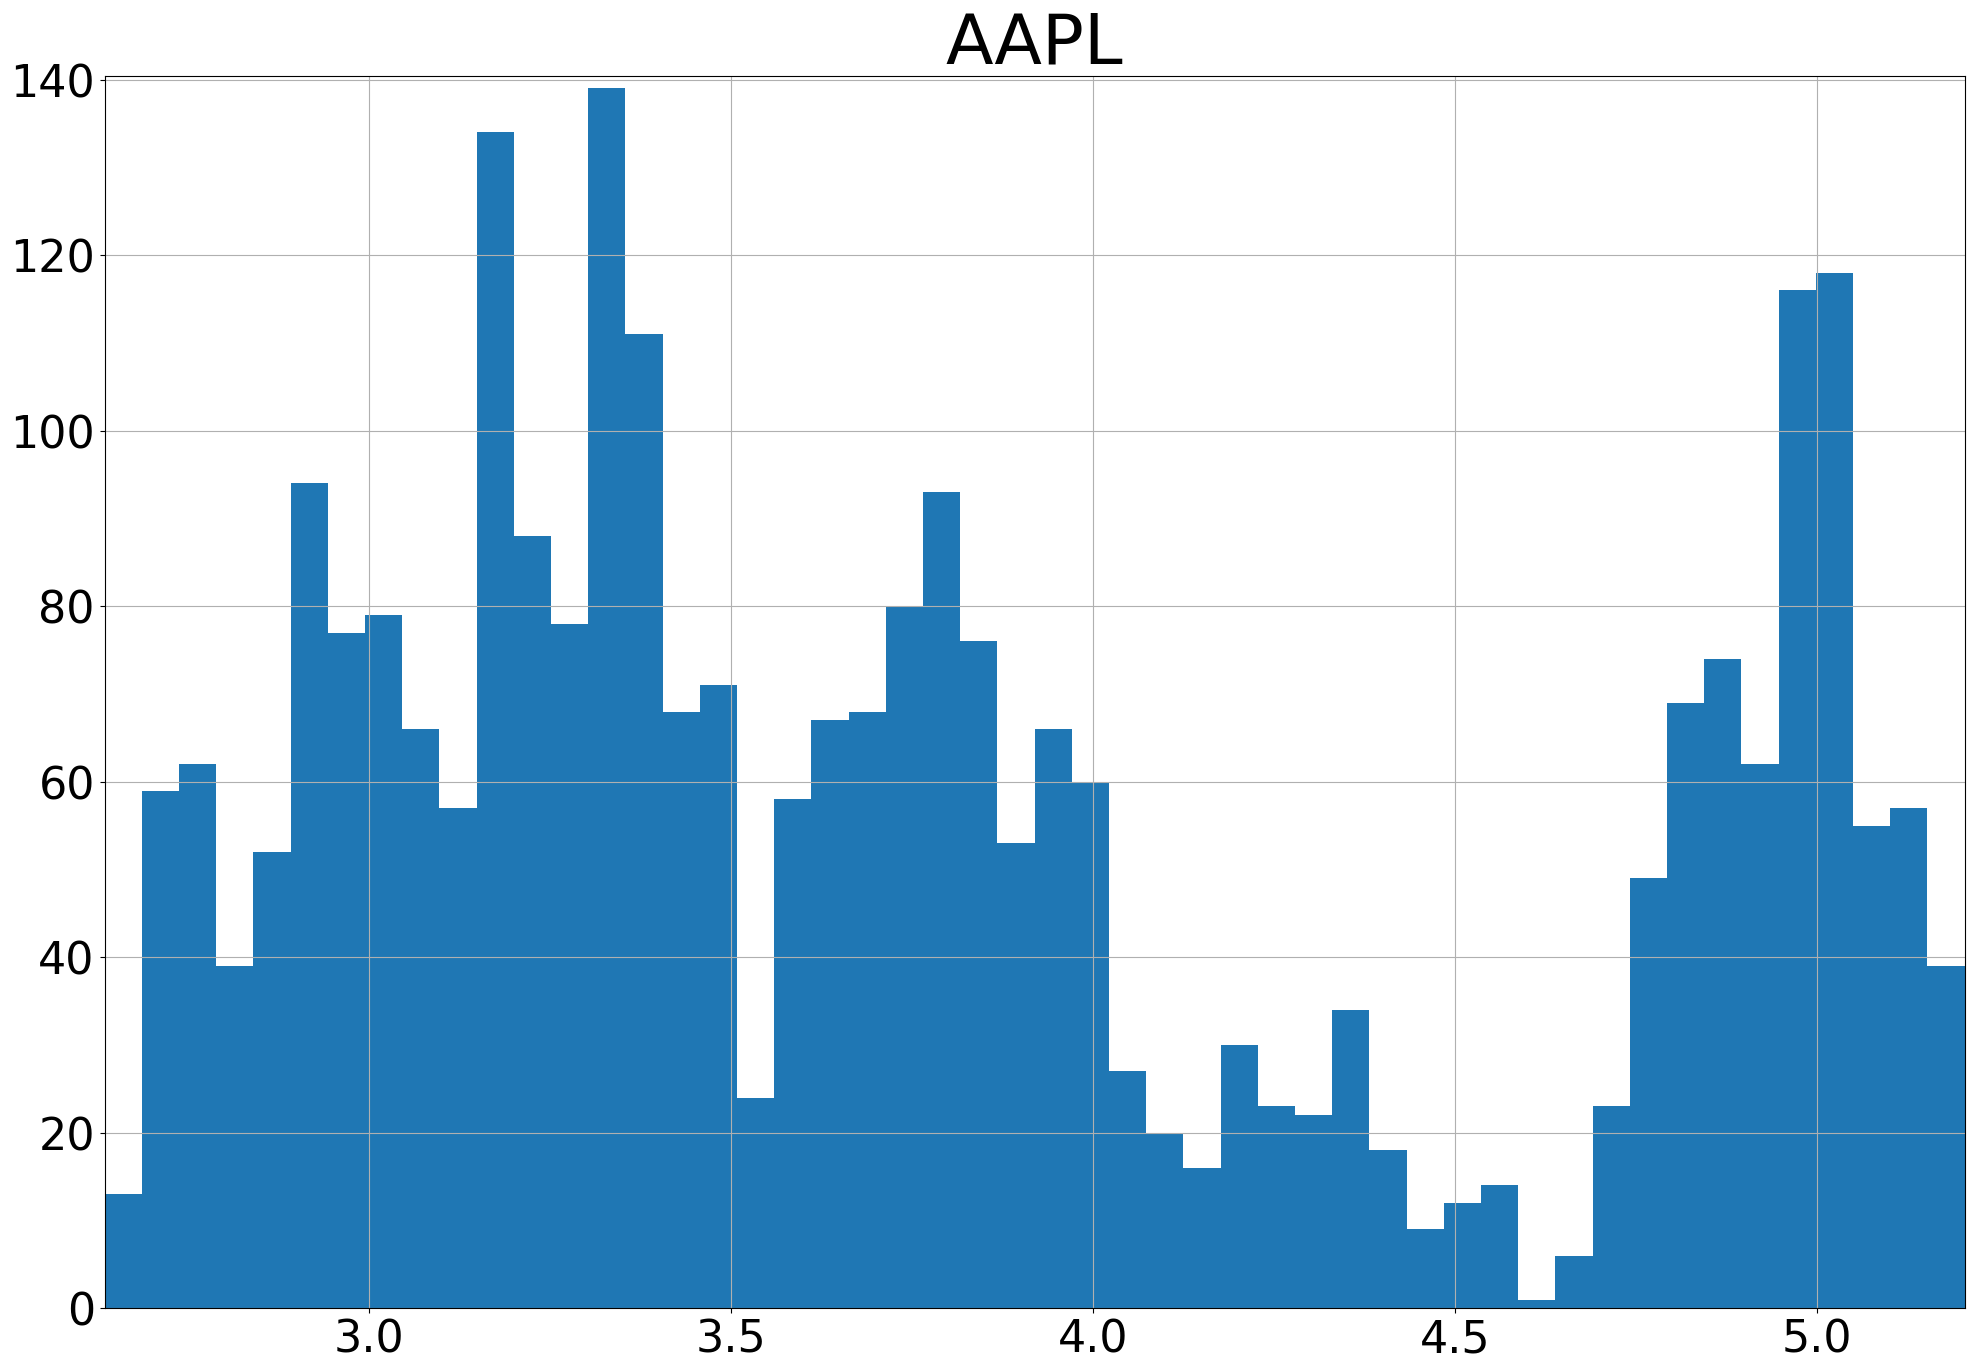

In [22]:
fig, ax = plt.subplots(figsize = (24,16))
log_data["AAPL"].hist(bins = 50)
ax.set_title("AAPL", fontsize = 50)

In [23]:
log_diff_data = log_data.diff().dropna()

Text(0.5, 1.0, 'AAPL')

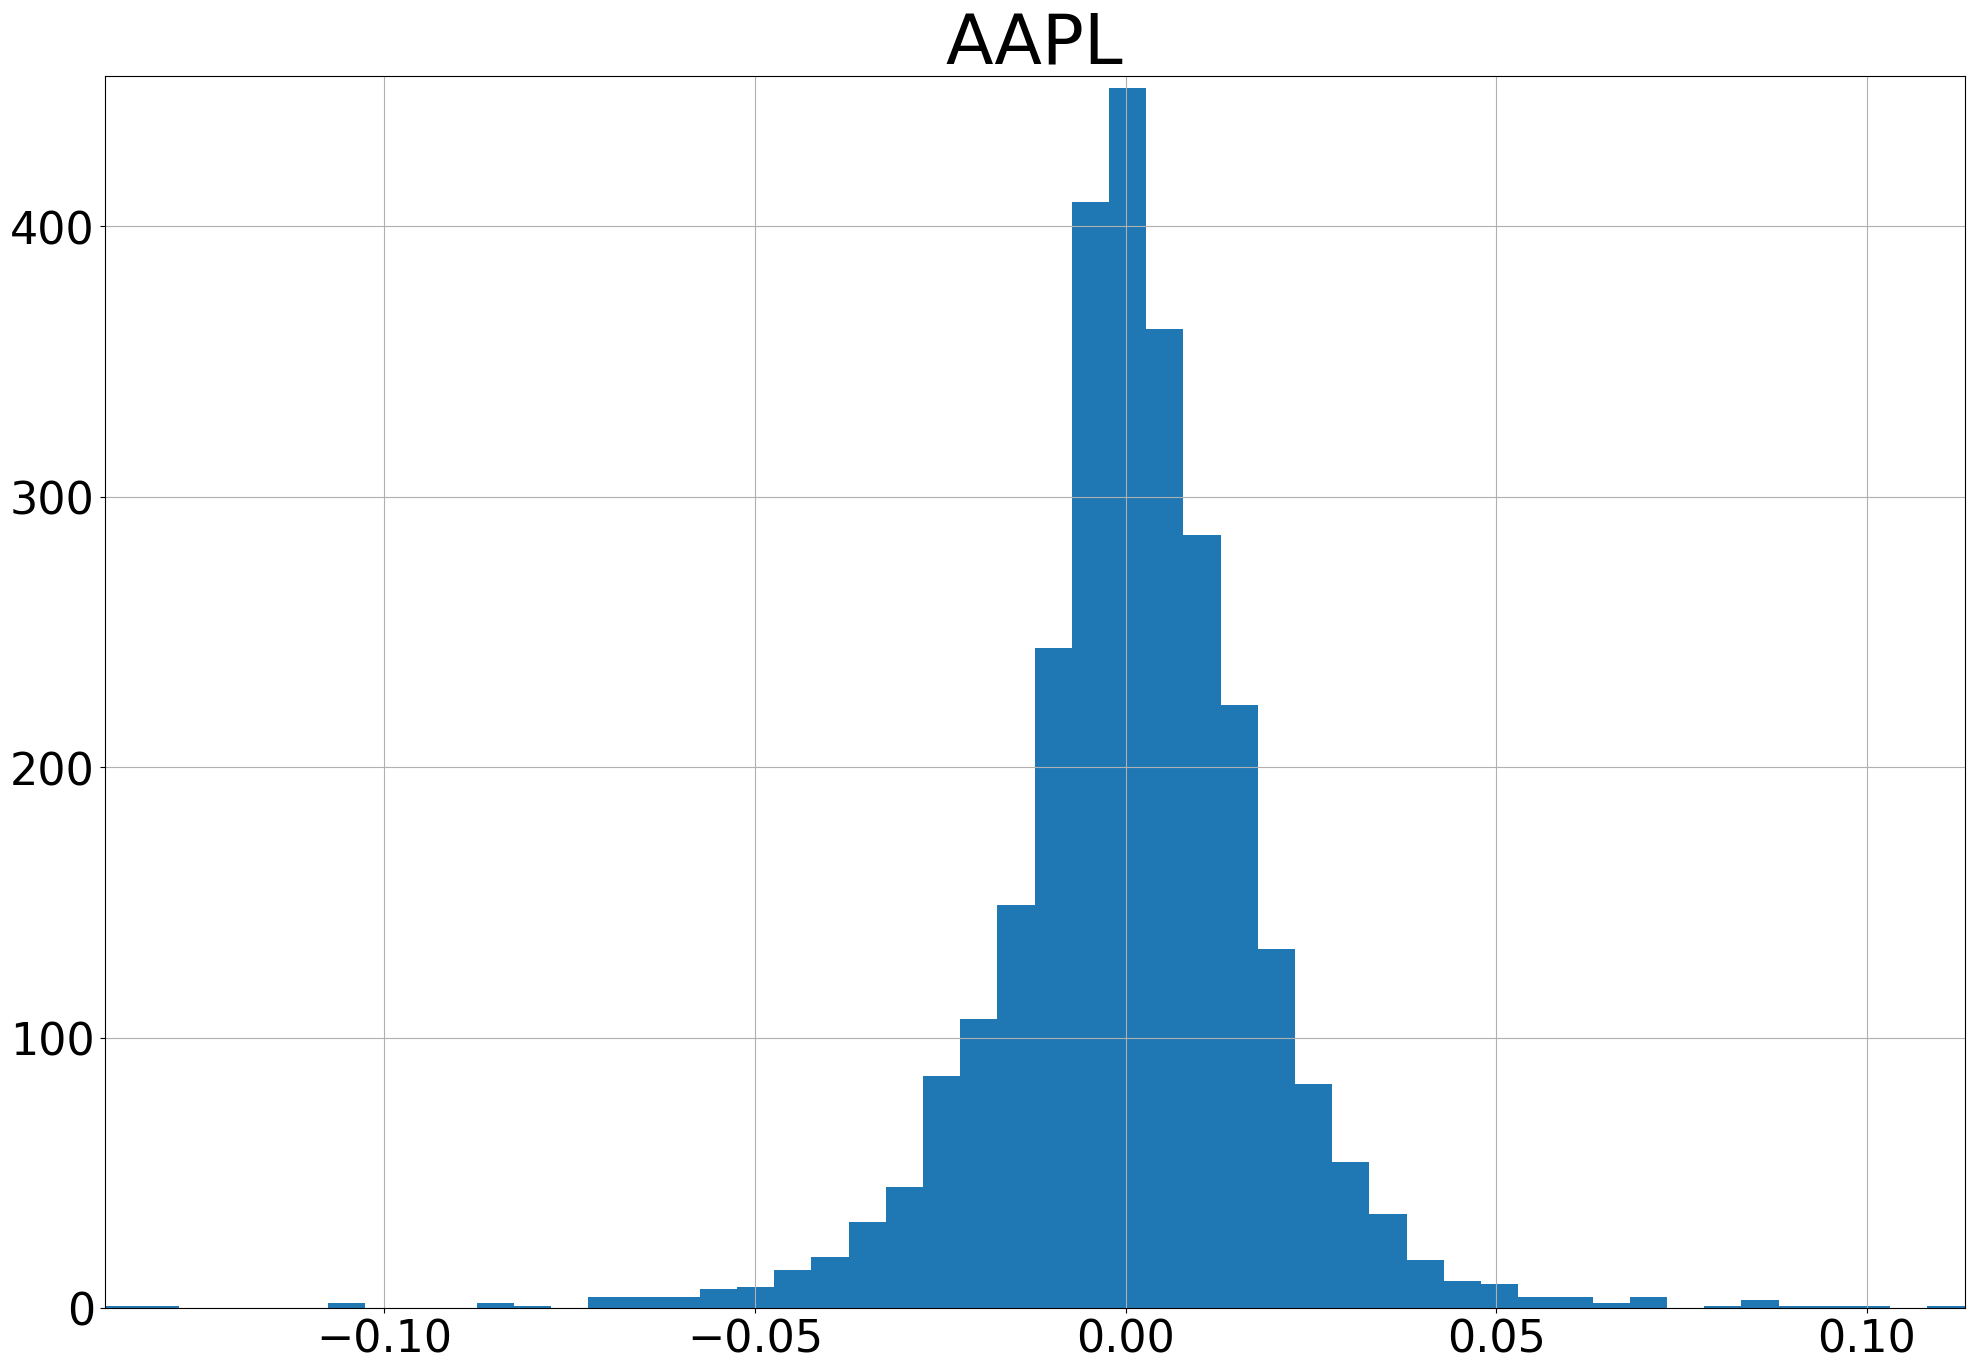

In [24]:
fig, ax = plt.subplots(figsize = (24,16))
log_diff_data["AAPL"].hist(bins = 50)
ax.set_title("AAPL", fontsize = 50)

In [25]:
def graph_yearly_distributions(data, stock, figsize = (24,12), density = False):
    years = sorted(list(set(data.index.year)))
    fig, ax = plt.subplots(figsize = figsize)
    for year in years:
        color = "C" + str(year%12)
        year = str(year)
        plot_data = data[stock].loc[year]
        plot_data.plot.hist(color = color, 
                            ax=ax, 
                            alpha = 0.5, 
                            bins = 20,
                            density = density,
                            label = year)
        ax.axvline(plot_data.mean(), 
                  color = color,
                  linewidth = 5,
                  ls = "--")
        ax.set_title(stock)
        ax.legend(bbox_to_anchor = (1,1))

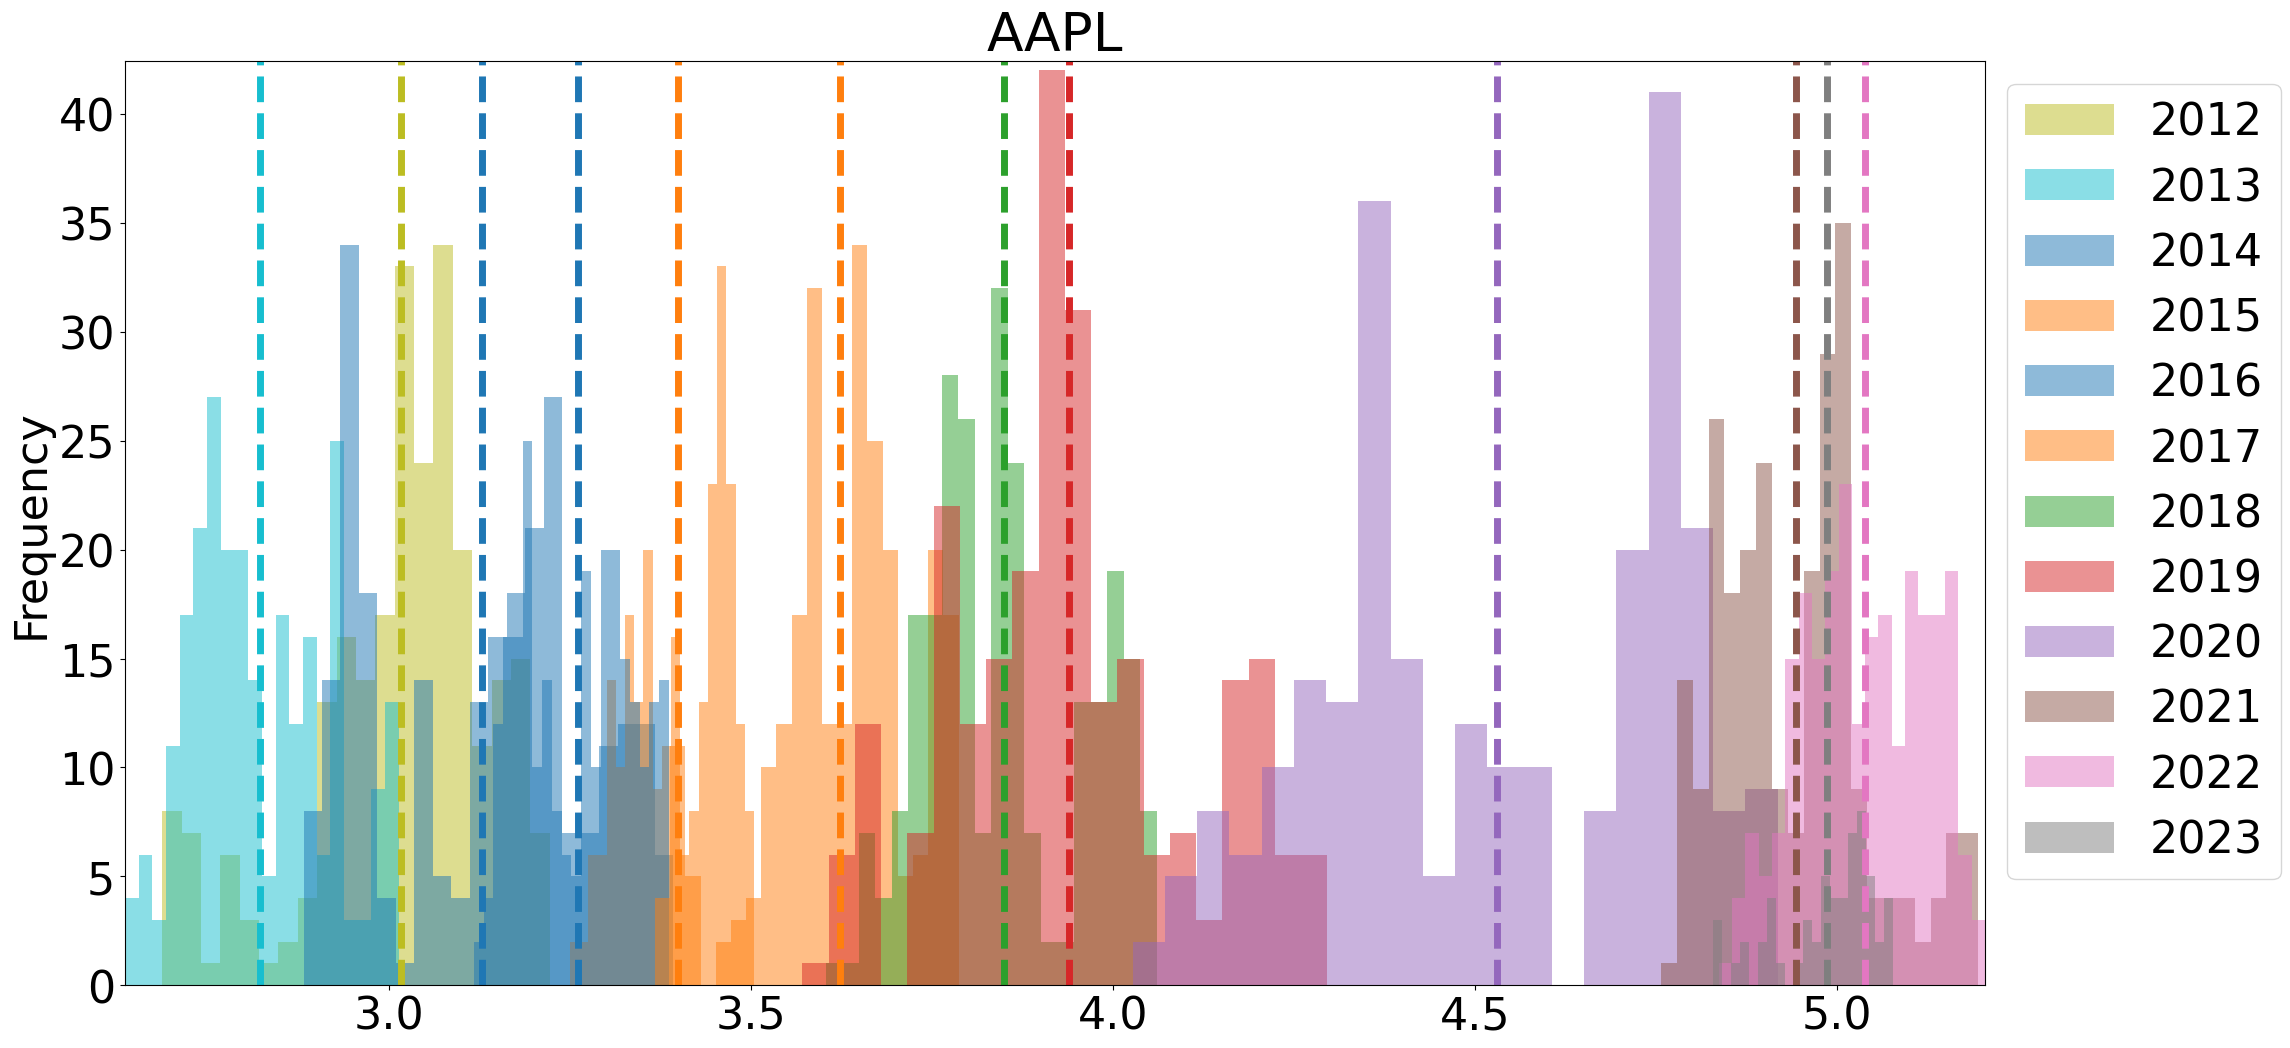

In [26]:
graph_yearly_distributions(log_data, "AAPL")

In [27]:
price_change_data = log_data.diff().dropna()
price_change_data

MSFT      AAPL        PG      TSLA
Date                                              
2012-01-04  0.023261  0.005360 -0.000449 -0.013264
2012-01-05  0.010167  0.011041 -0.004201 -0.021522
2012-01-06  0.015415  0.010400 -0.002408 -0.007773
2012-01-09 -0.013250 -0.001587  0.004211  0.012556
2012-01-10  0.003598  0.003574 -0.004663  0.013486
...              ...       ...       ...       ...
2023-03-21  0.005678  0.011873 -0.007261  0.075292
2023-03-22 -0.005457 -0.009145 -0.000625 -0.033085
2023-03-23  0.019530  0.006945 -0.001390  0.005582
2023-03-24  0.010426  0.008271  0.020172 -0.009461
2023-03-27 -0.015047 -0.012369 -0.005262  0.007326

[2825 rows x 4 columns]

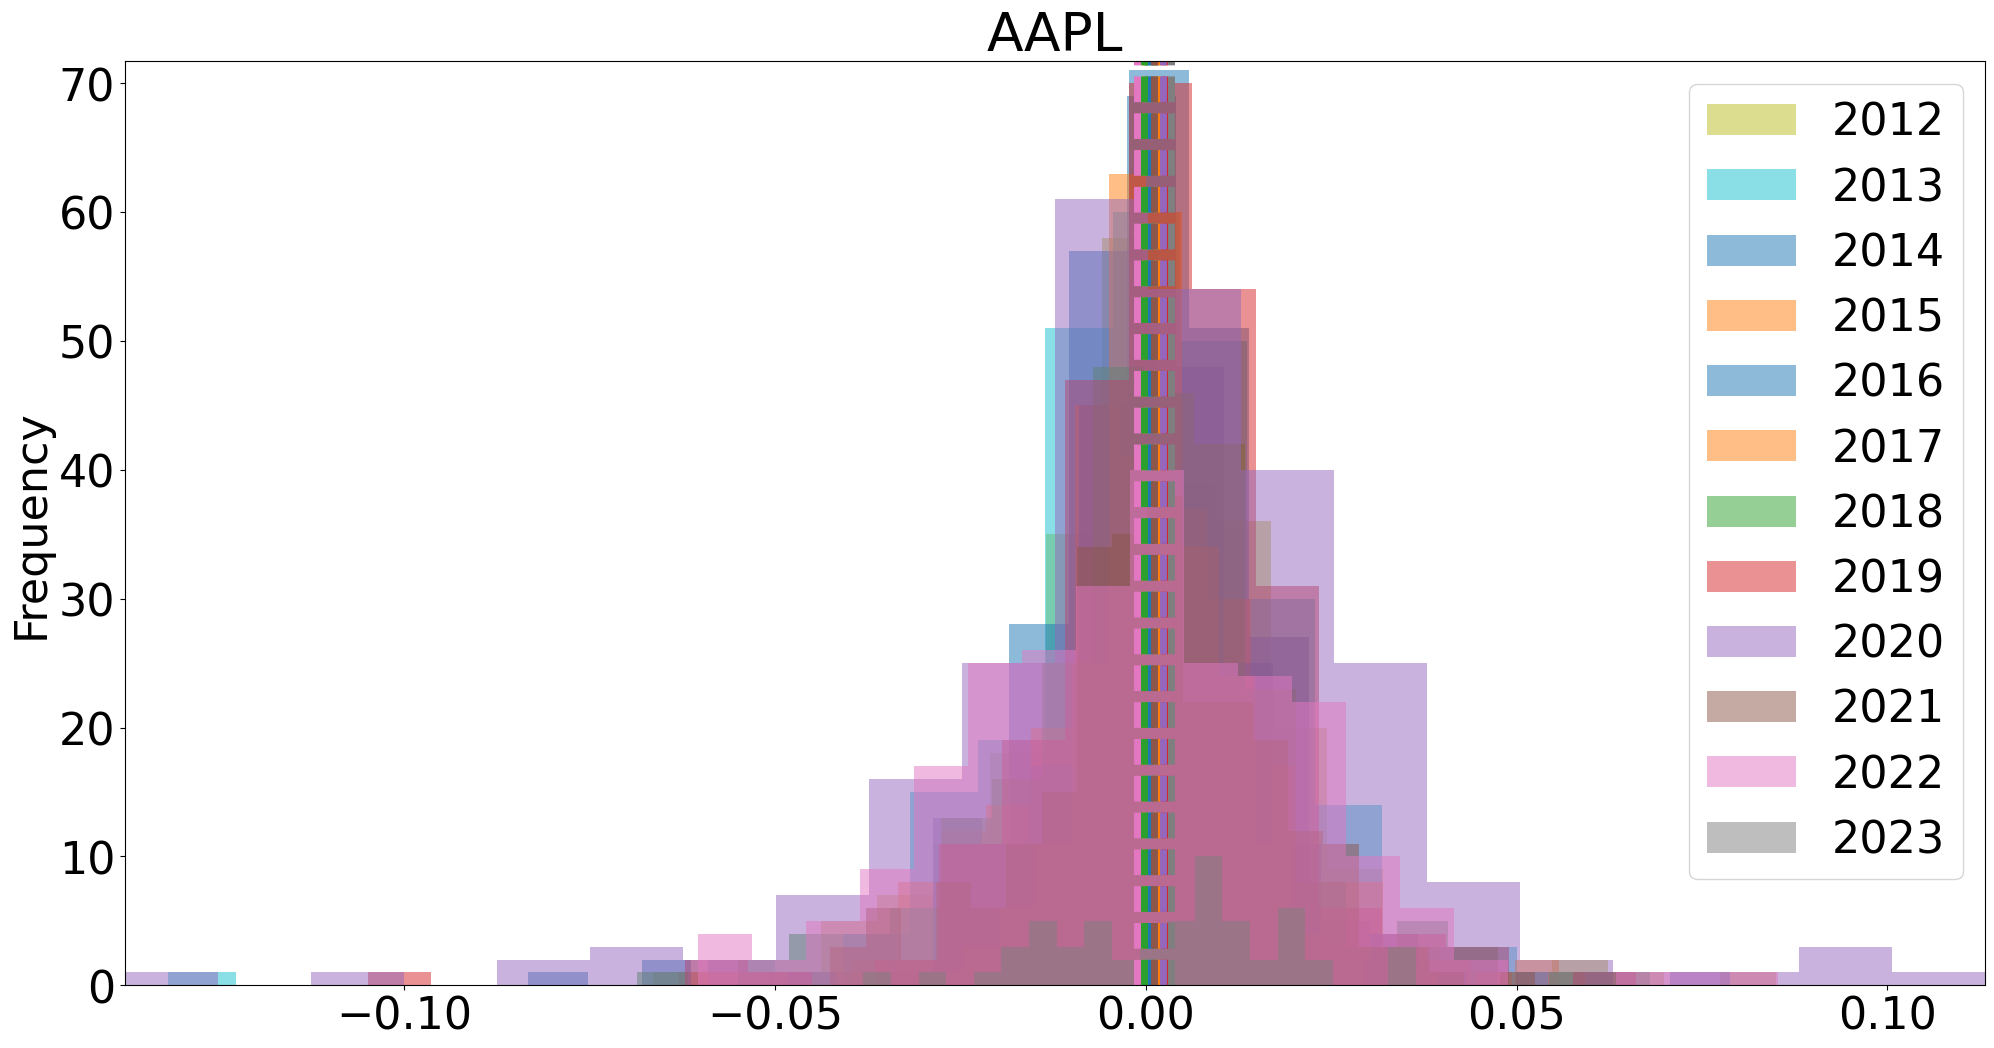

In [28]:
graph_yearly_distributions(price_change_data, "AAPL")

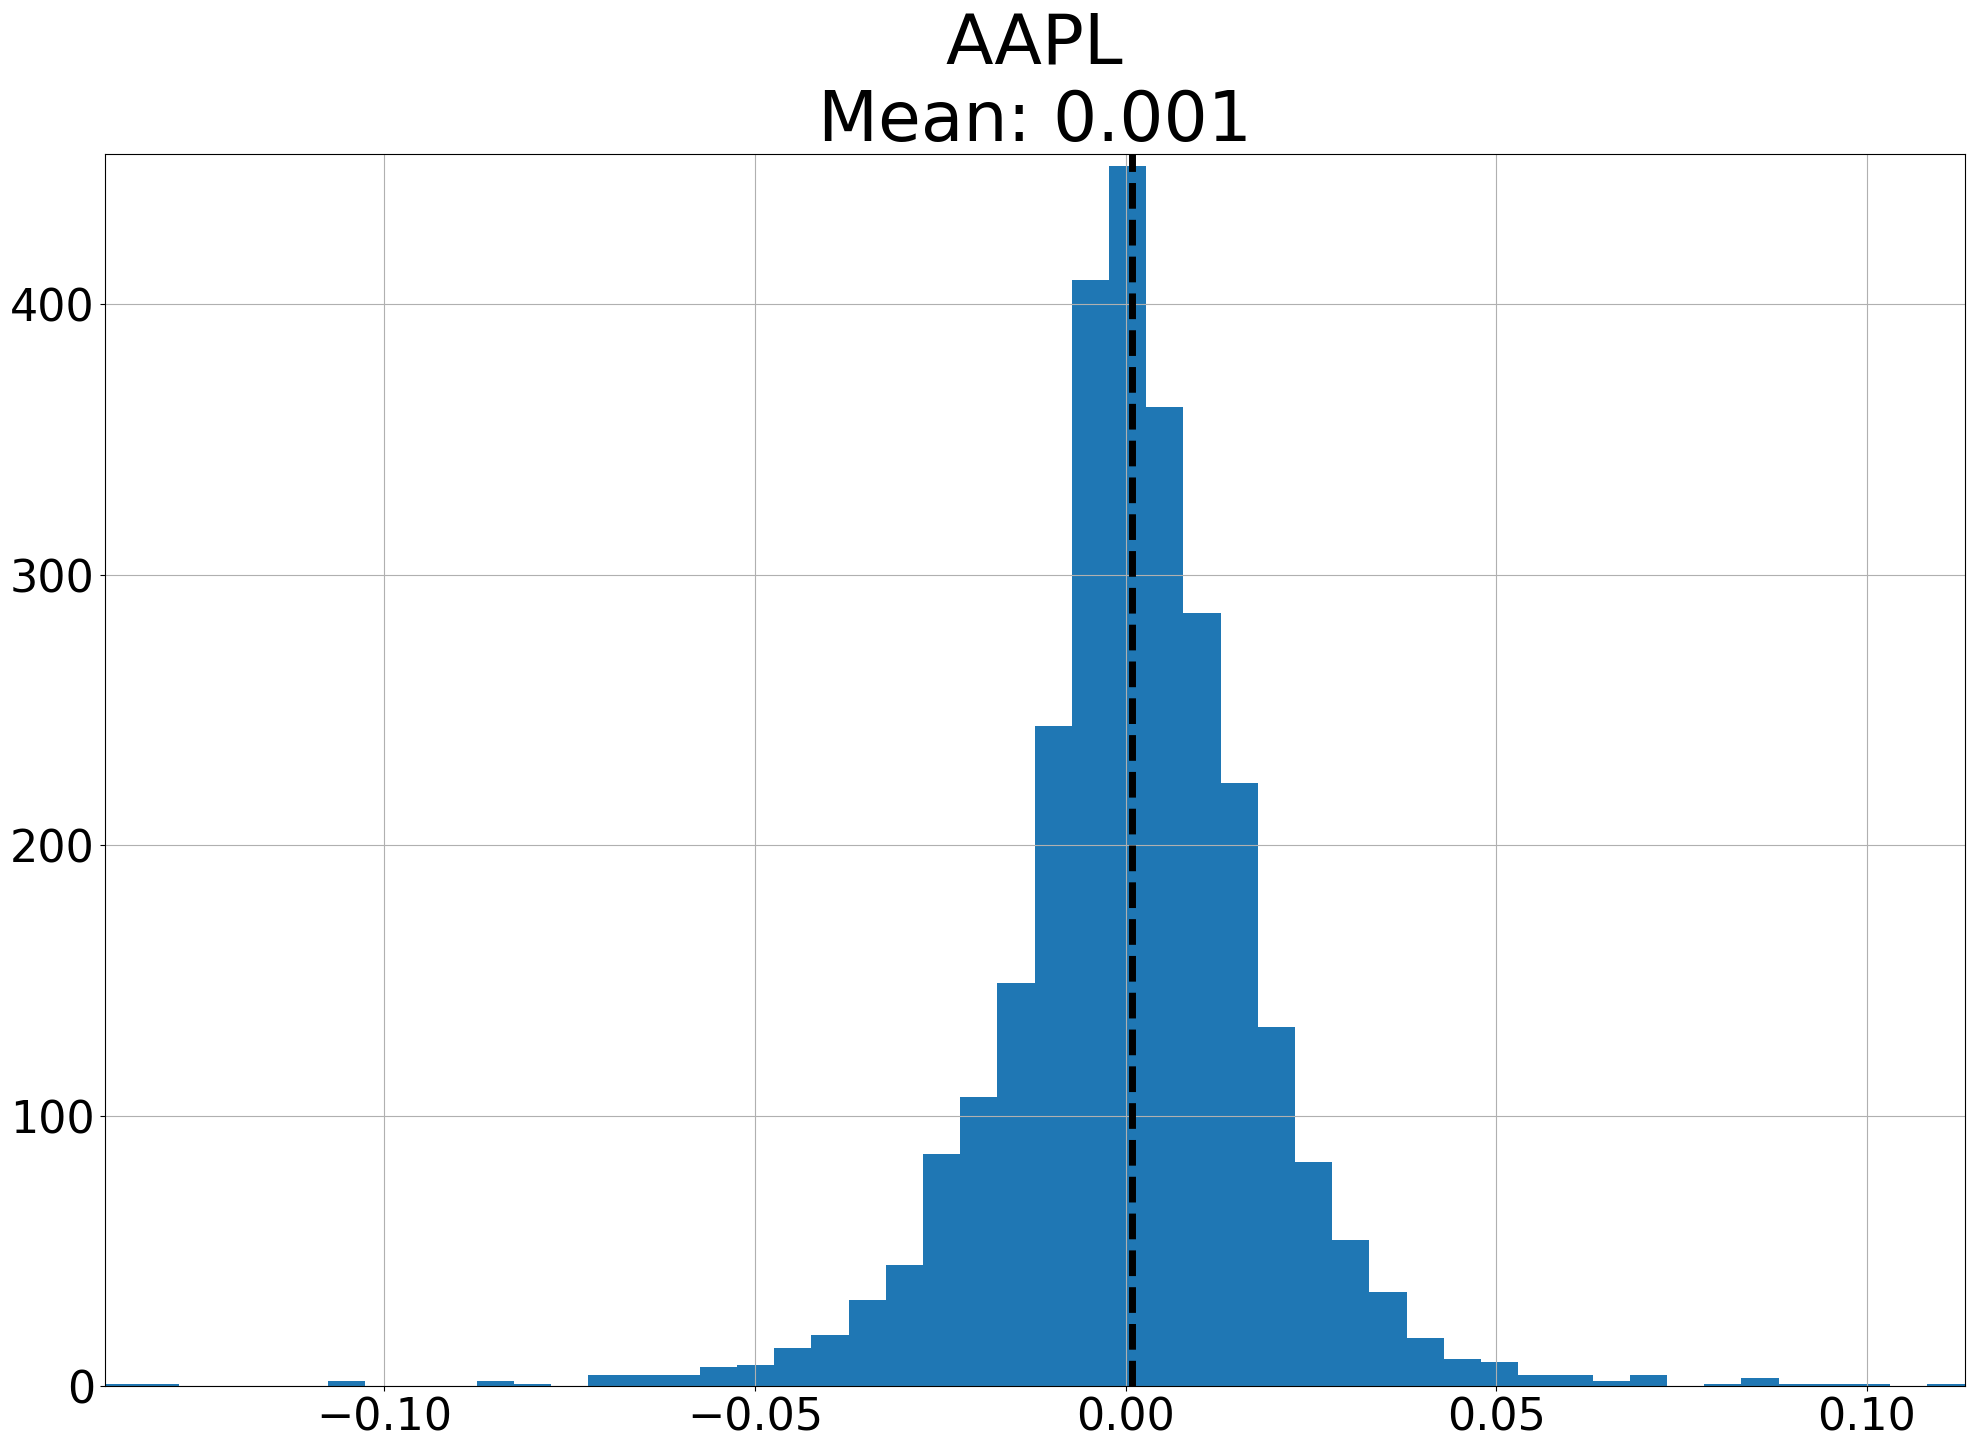

In [29]:
fig, ax = plt.subplots(figsize = (24,16))
stock = "AAPL"
mean = price_change_data[stock].mean()
price_change_data[stock].dropna().hist(bins = 50)
ax.set_title(stock + "\nMean: " + str(round(mean, 3)), fontsize = 50)
ax.axvline(mean, color = "k", linewidth = 5, ls = "--")

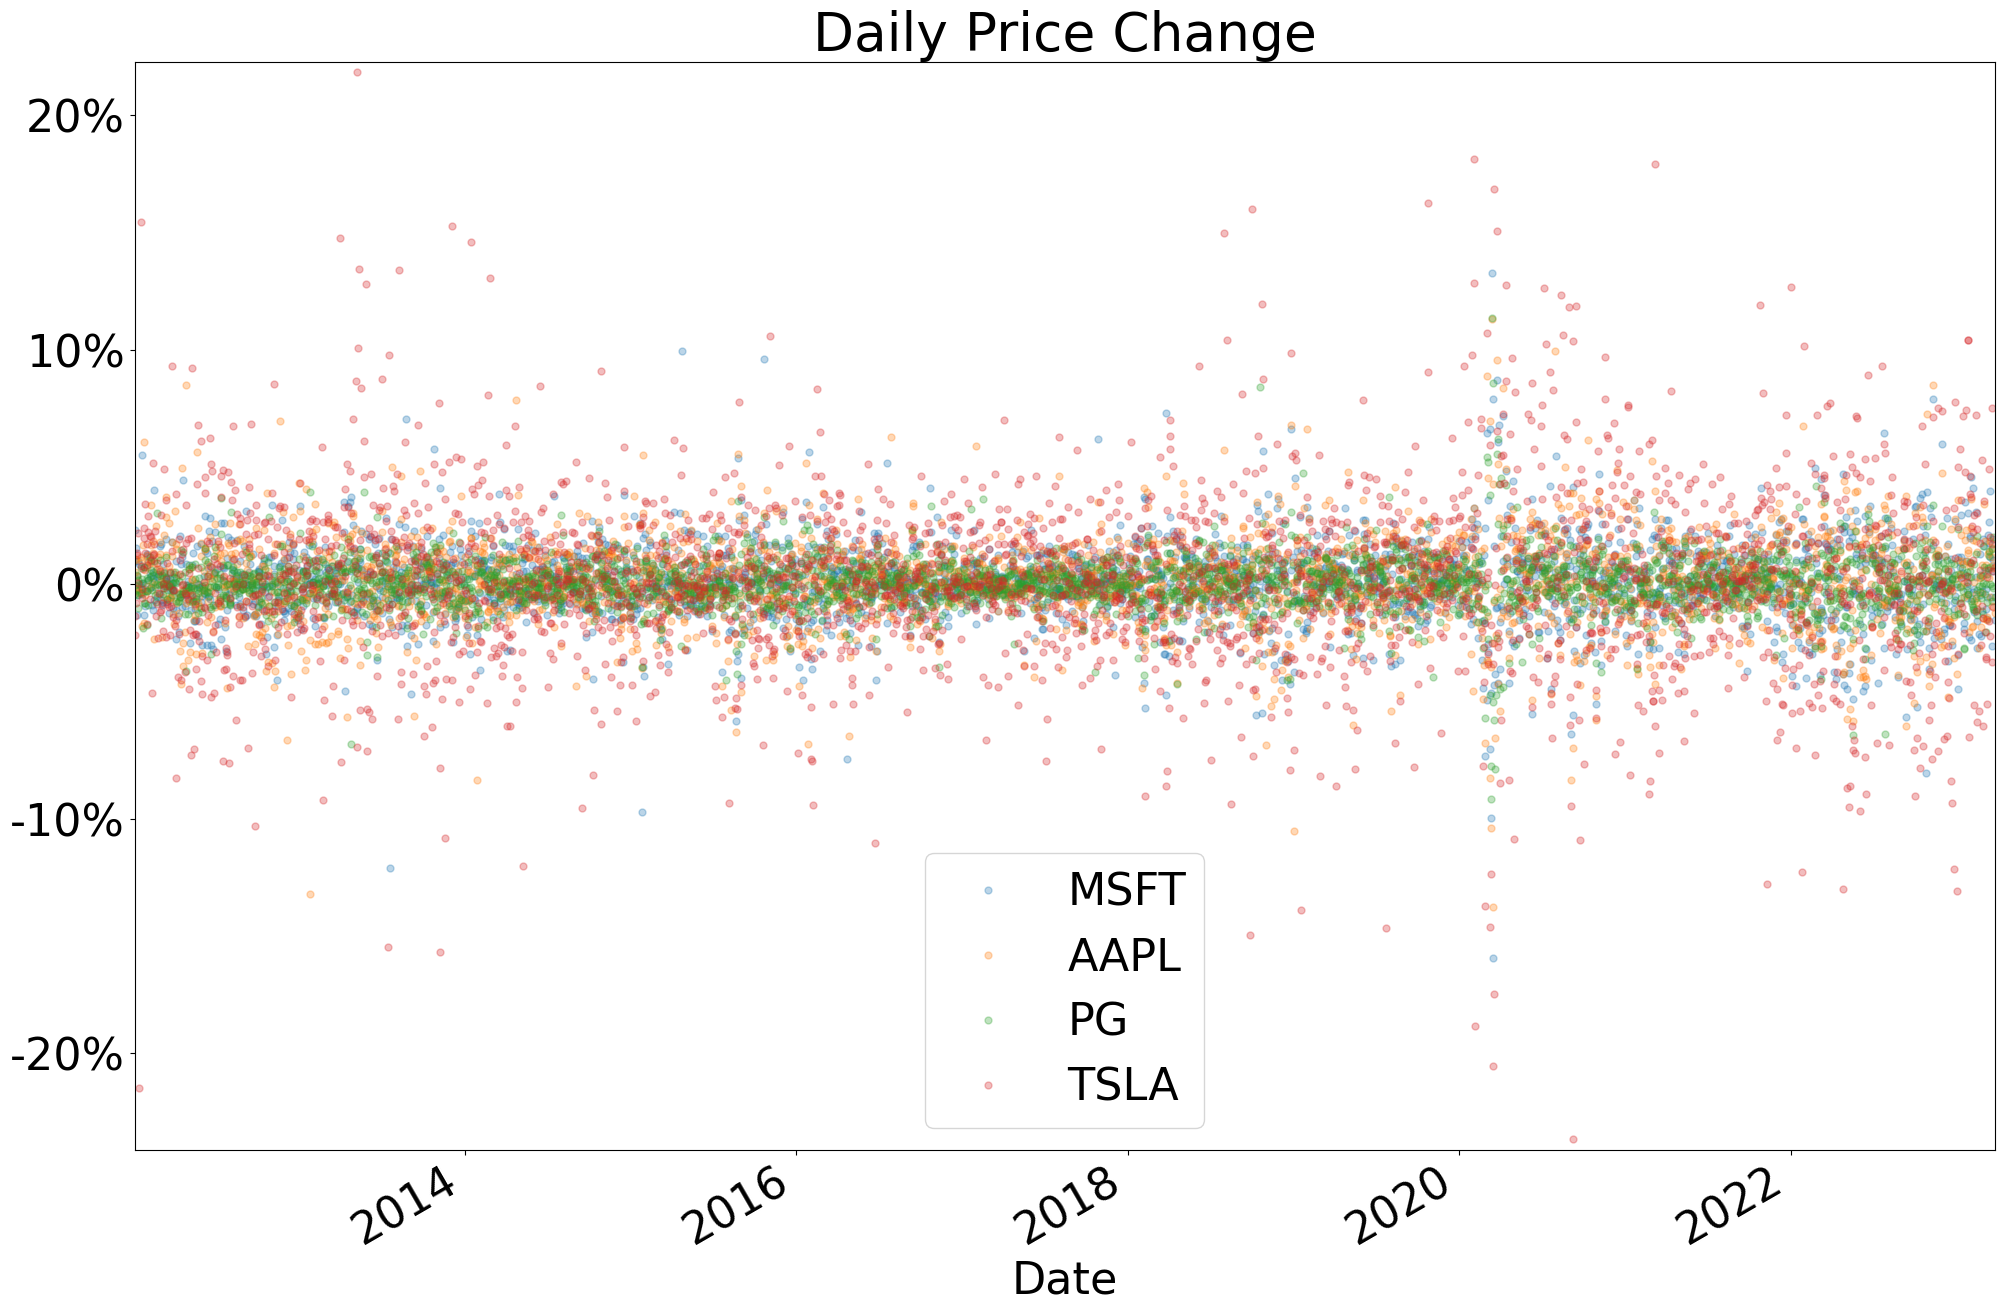

In [30]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data.keys():
    price_change_data[key].plot.line(marker = ".", ls = "",
                                     ax = ax, markersize = 10,
                                    alpha = 0.3)
ax.set_title("Daily Price Change")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(round(y * 100)) + "%" for y in y_vals])
plt.legend()

In [31]:
from stats import *
stats_df = gather_statistics(price_change_data, sample = True)

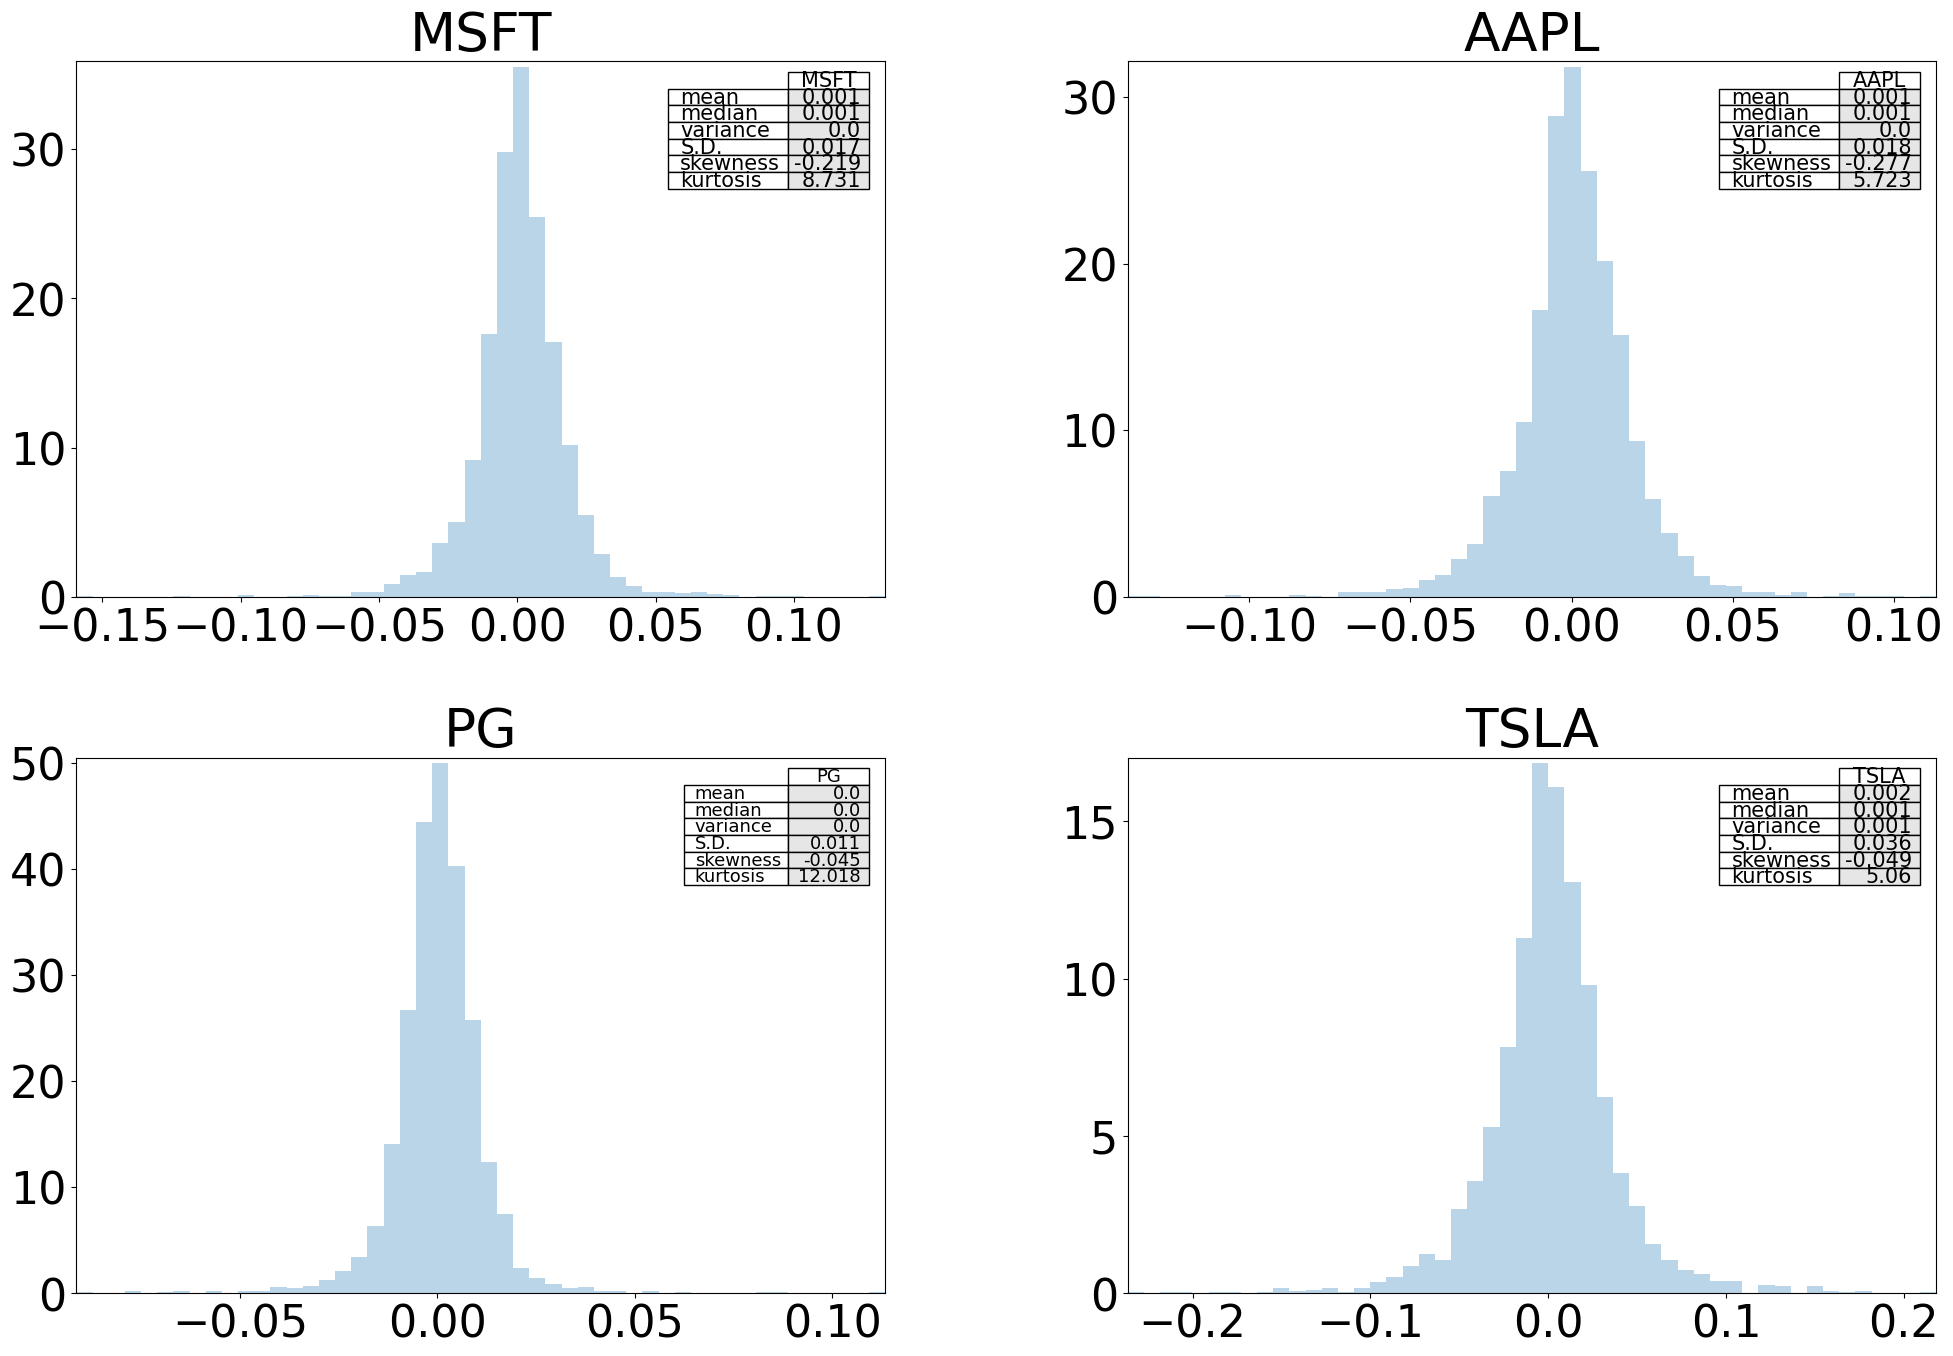

In [32]:
from pandas.plotting import table

fig, axs = plt.subplots(2,2, figsize = (24,16))
price_change_data.hist(bins = 50,
                      alpha = 0.3,
                      label = price_change_data.keys(),
                      ax = axs,
                      density = True)

for ax in axs:
    for a in ax:
        stock = a.get_title()
        hist_data = stats_df[stock] 
        stats =table(a, hist_data, 
                     colWidths=[.1], 
                     cellColours=[[(.9,.9,.9)]]*6, 
                     loc = "upper right")
        a.grid(False)

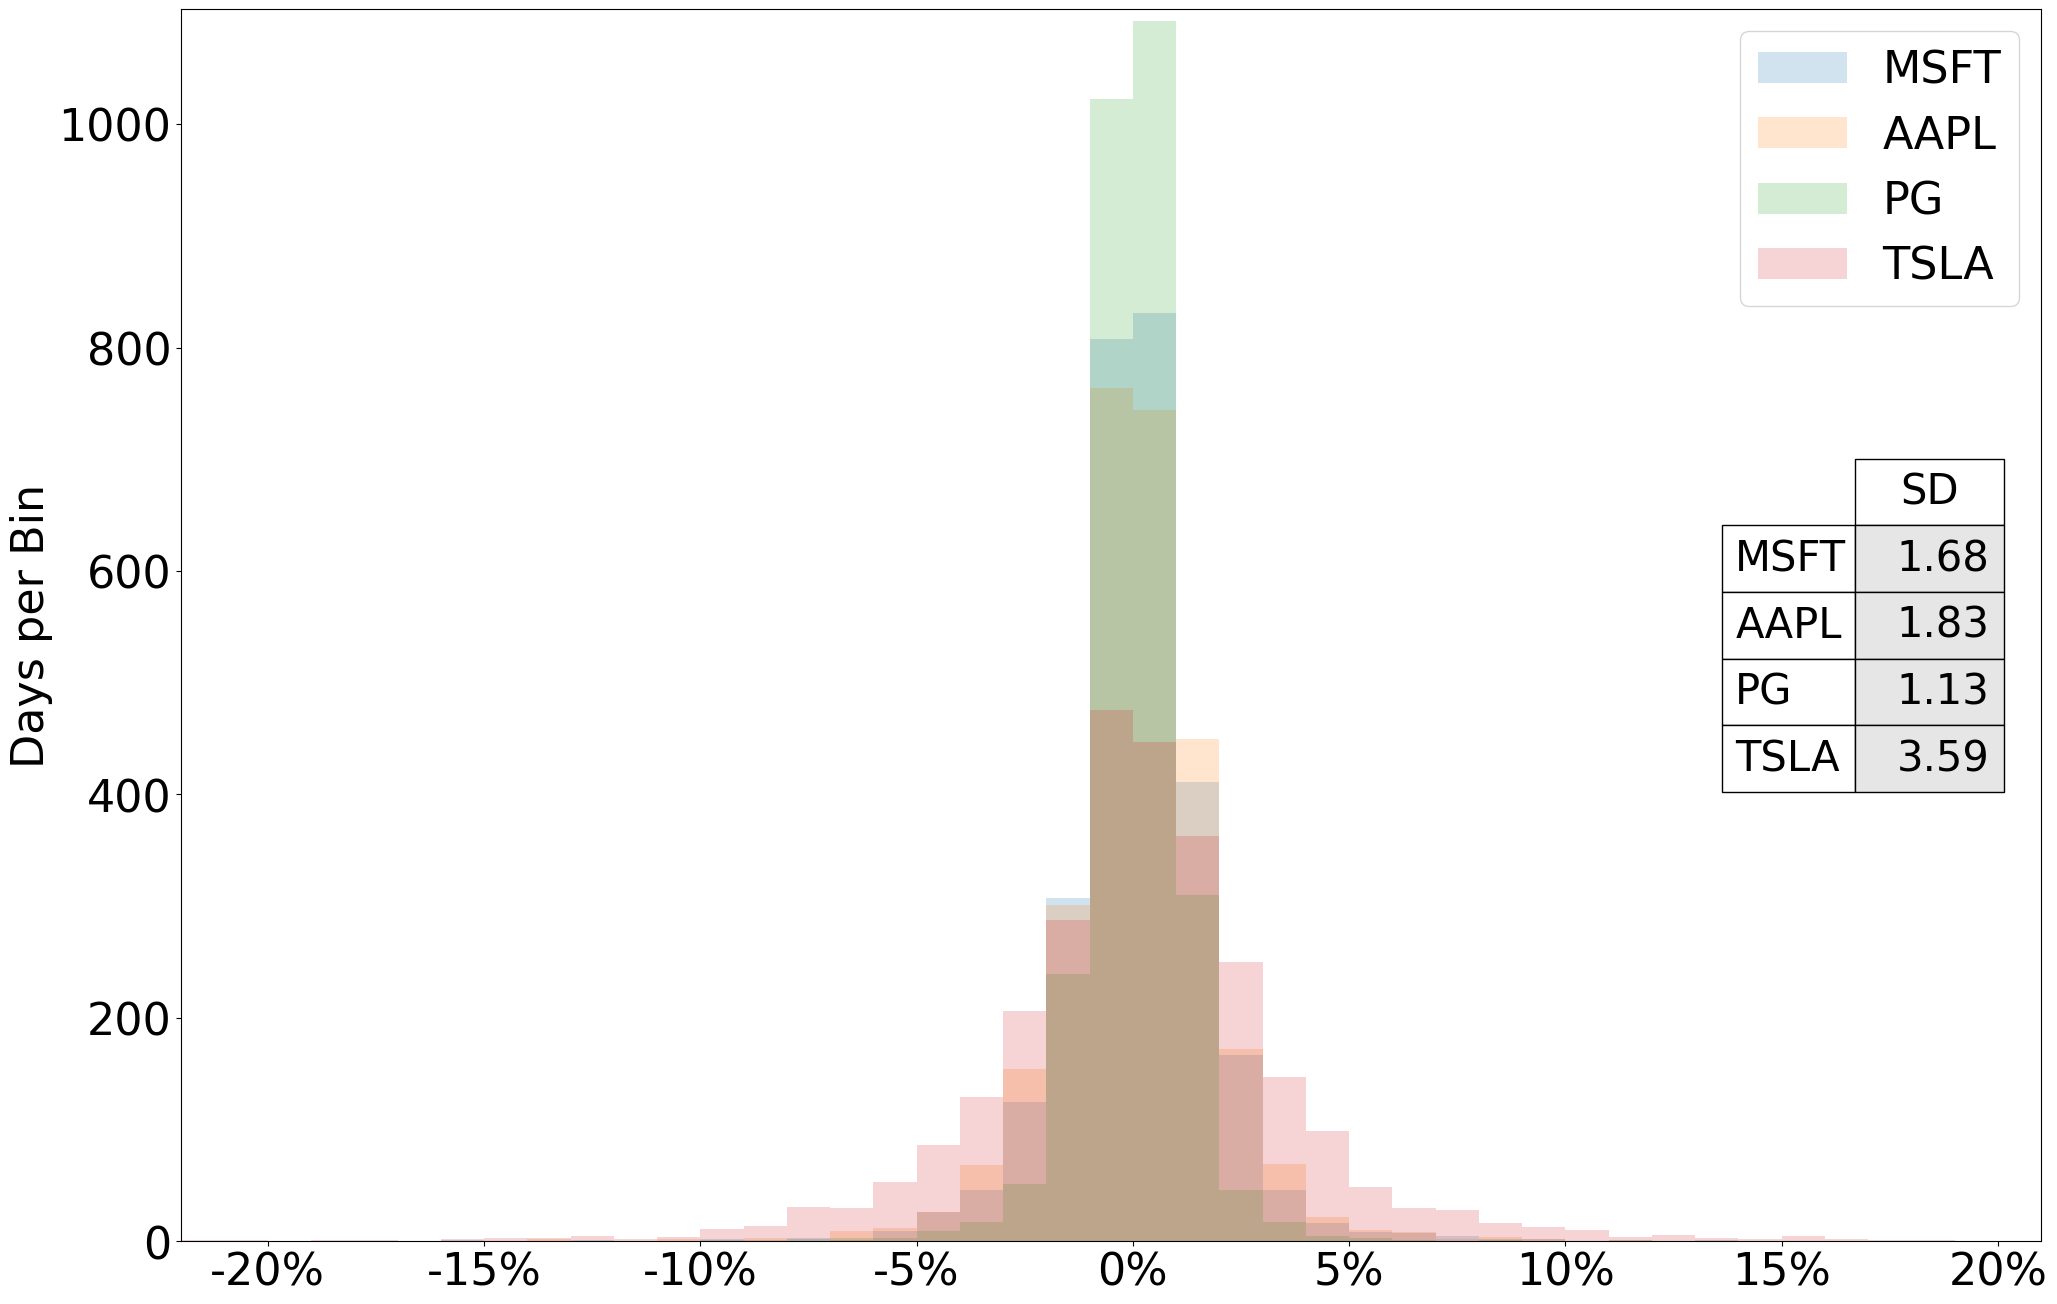

In [33]:
plot_data = price_change_data.mul(100)
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    plot_data[key].hist(bins = [x for x in range(-22,22,1)],
                               alpha = 0.2,
                               label = key,
                               density = False)
ax.set_ylabel("Days per Bin")
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])  
std_df = round(pd.DataFrame(plot_data.std(), columns = ["SD"]),2)
stats =table(ax, 
             std_df, 
             colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, 
             loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)
plt.legend()

In [34]:
norm_plot_data = price_change_data.div(price_change_data.std())
norm_plot_data

MSFT      AAPL        PG      TSLA
Date                                              
2012-01-04  1.384797  0.292693 -0.039586 -0.369806
2012-01-05  0.605277  0.602940 -0.370351 -0.600015
2012-01-06  0.917712  0.567920 -0.212320 -0.216721
2012-01-09 -0.788808 -0.086690  0.371232  0.350047
2012-01-10  0.214224  0.195181 -0.411098  0.375992
...              ...       ...       ...       ...
2023-03-21  0.337998  0.648405 -0.640205  2.099112
2023-03-22 -0.324879 -0.499416 -0.055089 -0.922398
2023-03-23  1.162652  0.379283 -0.122556  0.155627
2023-03-24  0.620683  0.451695  1.778536 -0.263765
2023-03-27 -0.895760 -0.675498 -0.463934  0.204235

[2825 rows x 4 columns]

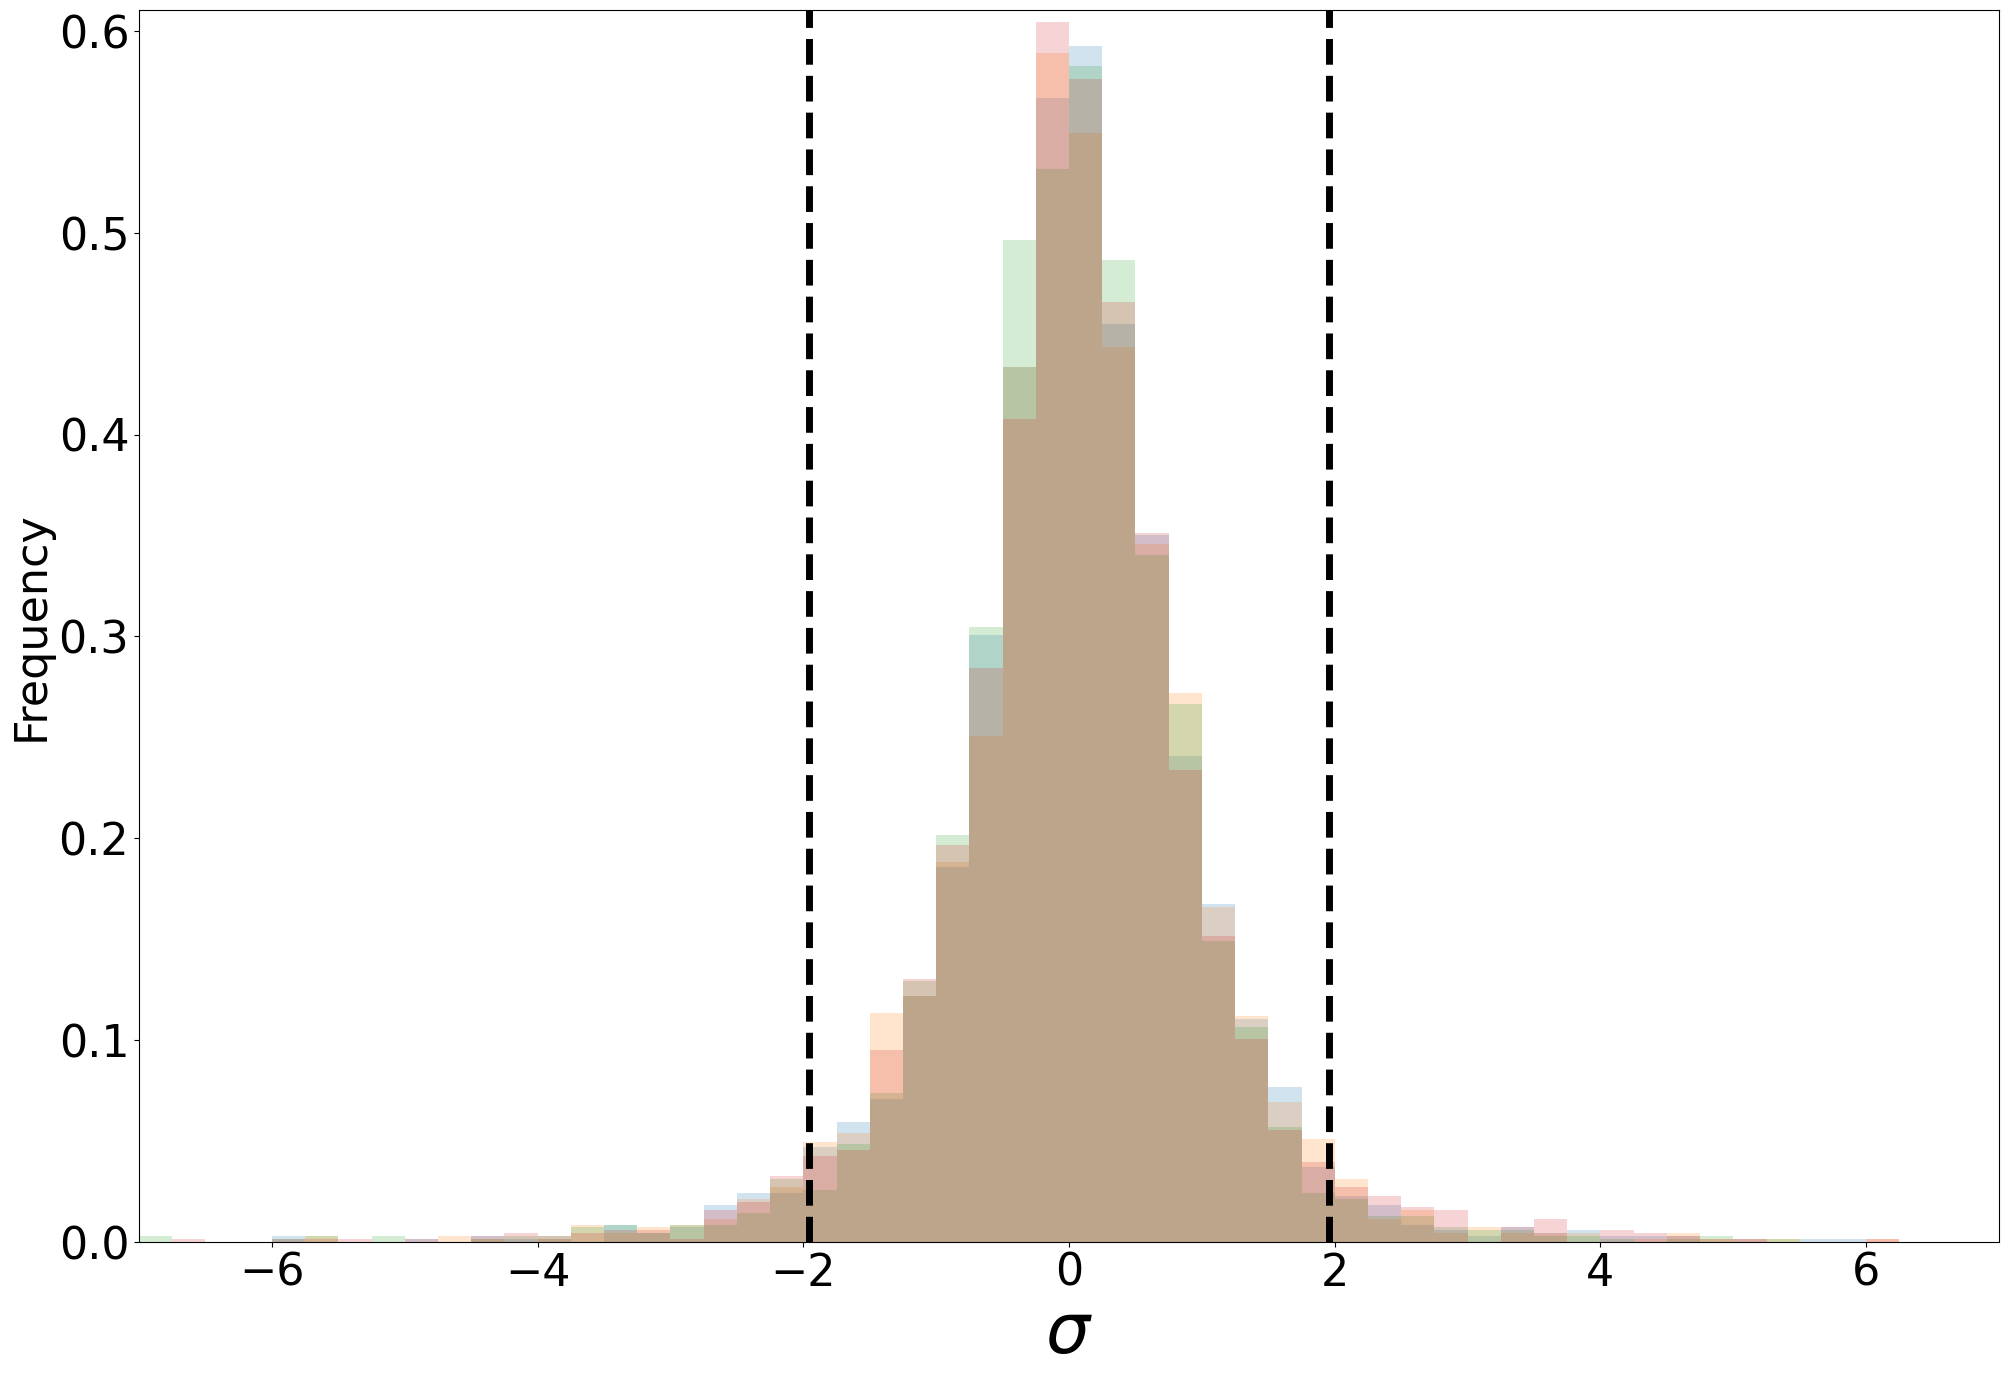

In [35]:
fig, ax = plt.subplots(figsize = (24,16))
for key in norm_plot_data:
    norm_plot_data[key].hist(bins = [x/4 for x in range(-28,29,1)],
                               alpha = 0.2,
                               label = key,
                               density = True)
ax.set_ylabel("Frequency")
x_vals = ax.get_xticks()
ax.set_xlabel("$\sigma$", fontsize = 50)  
# If data is normally distributed, 95% of the data will lie between (-1.96,1.96) standard devs from the mean
ax.axvline(-1.96, linewidth = 5, ls = "--", color = "k")
ax.axvline(1.96, linewidth = 5, ls = "--", color = "k")
ax.grid(False)

### $\beta$ and Volatility

By plotting distributions of specific stocks, we have casually shown that TSLA is relatively volatile compared to PG, MSFT, and AAPL. Yet, how would we compare this volatility to the *average* volatility in the market? In finance, the relative volatility of a stock is referred to as it's $\beta$ (_beta_). $\beta$ is unique for each security in a portfolio. It is a weight that describes the sensitivity of that security to market changes. $\beta$ is generally found using past market data, where average market performance is indicated by the S&P500.A $\beta$ for a given security, $i$, can be found by taking the ratio of the covariance between the returns from that security and the market returns, and the variance of the market returns. This will quantify relative volatility of a security: 
<h3 align="center">
    <font size="5">
        $ \beta_i = \frac{Cov(r_i,r_m)}{Var(r_m)}$
    </font>
</h3>

Let's add the S&P500 to our list of stocks and compare the distribution of changes in each stock to the S&P500. We will save the list of stocks before adding the S&P500 to aid the next part of this exercise.

In [36]:
stocks = list(price_change_data.keys())
price_change_data["S&P500"] = web.DataReader('^GSPC',  
                       start = start,
                       end = end)["Close"]
price_change_data["S&P500"] = np.log(price_change_data["S&P500"]).diff()
price_change_data.head()

[*********************100%***********************]  1 of 1 completed


MSFT      AAPL        PG      TSLA    S&P500
Date                                                        
2012-01-04  0.023261  0.005360 -0.000449 -0.013264       NaN
2012-01-05  0.010167  0.011041 -0.004201 -0.021522  0.002939
2012-01-06  0.015415  0.010400 -0.002408 -0.007773 -0.002540
2012-01-09 -0.013250 -0.001587  0.004211  0.012556  0.002259
2012-01-10  0.003598  0.003574 -0.004663  0.013486  0.008847

In [37]:
def calculate_beta(data, stock_key, market_key):
    df = data[[stock_key, market_key]].dropna()
    stock_cov = covariance(df[stock_key], df[market_key], sample = True) 
    market_var = variance(df[market_key], sample = True)
    beta = stock_cov / market_var
    
    return beta

betas = {}

for stock in stocks:
    betas[stock] = calculate_beta(price_change_data, stock, "S&P500")
pd.DataFrame(betas, index = ["$\\beta$"]).T

$\beta$
MSFT  1.188800
AAPL  1.173160
PG    0.582418
TSLA  1.447226

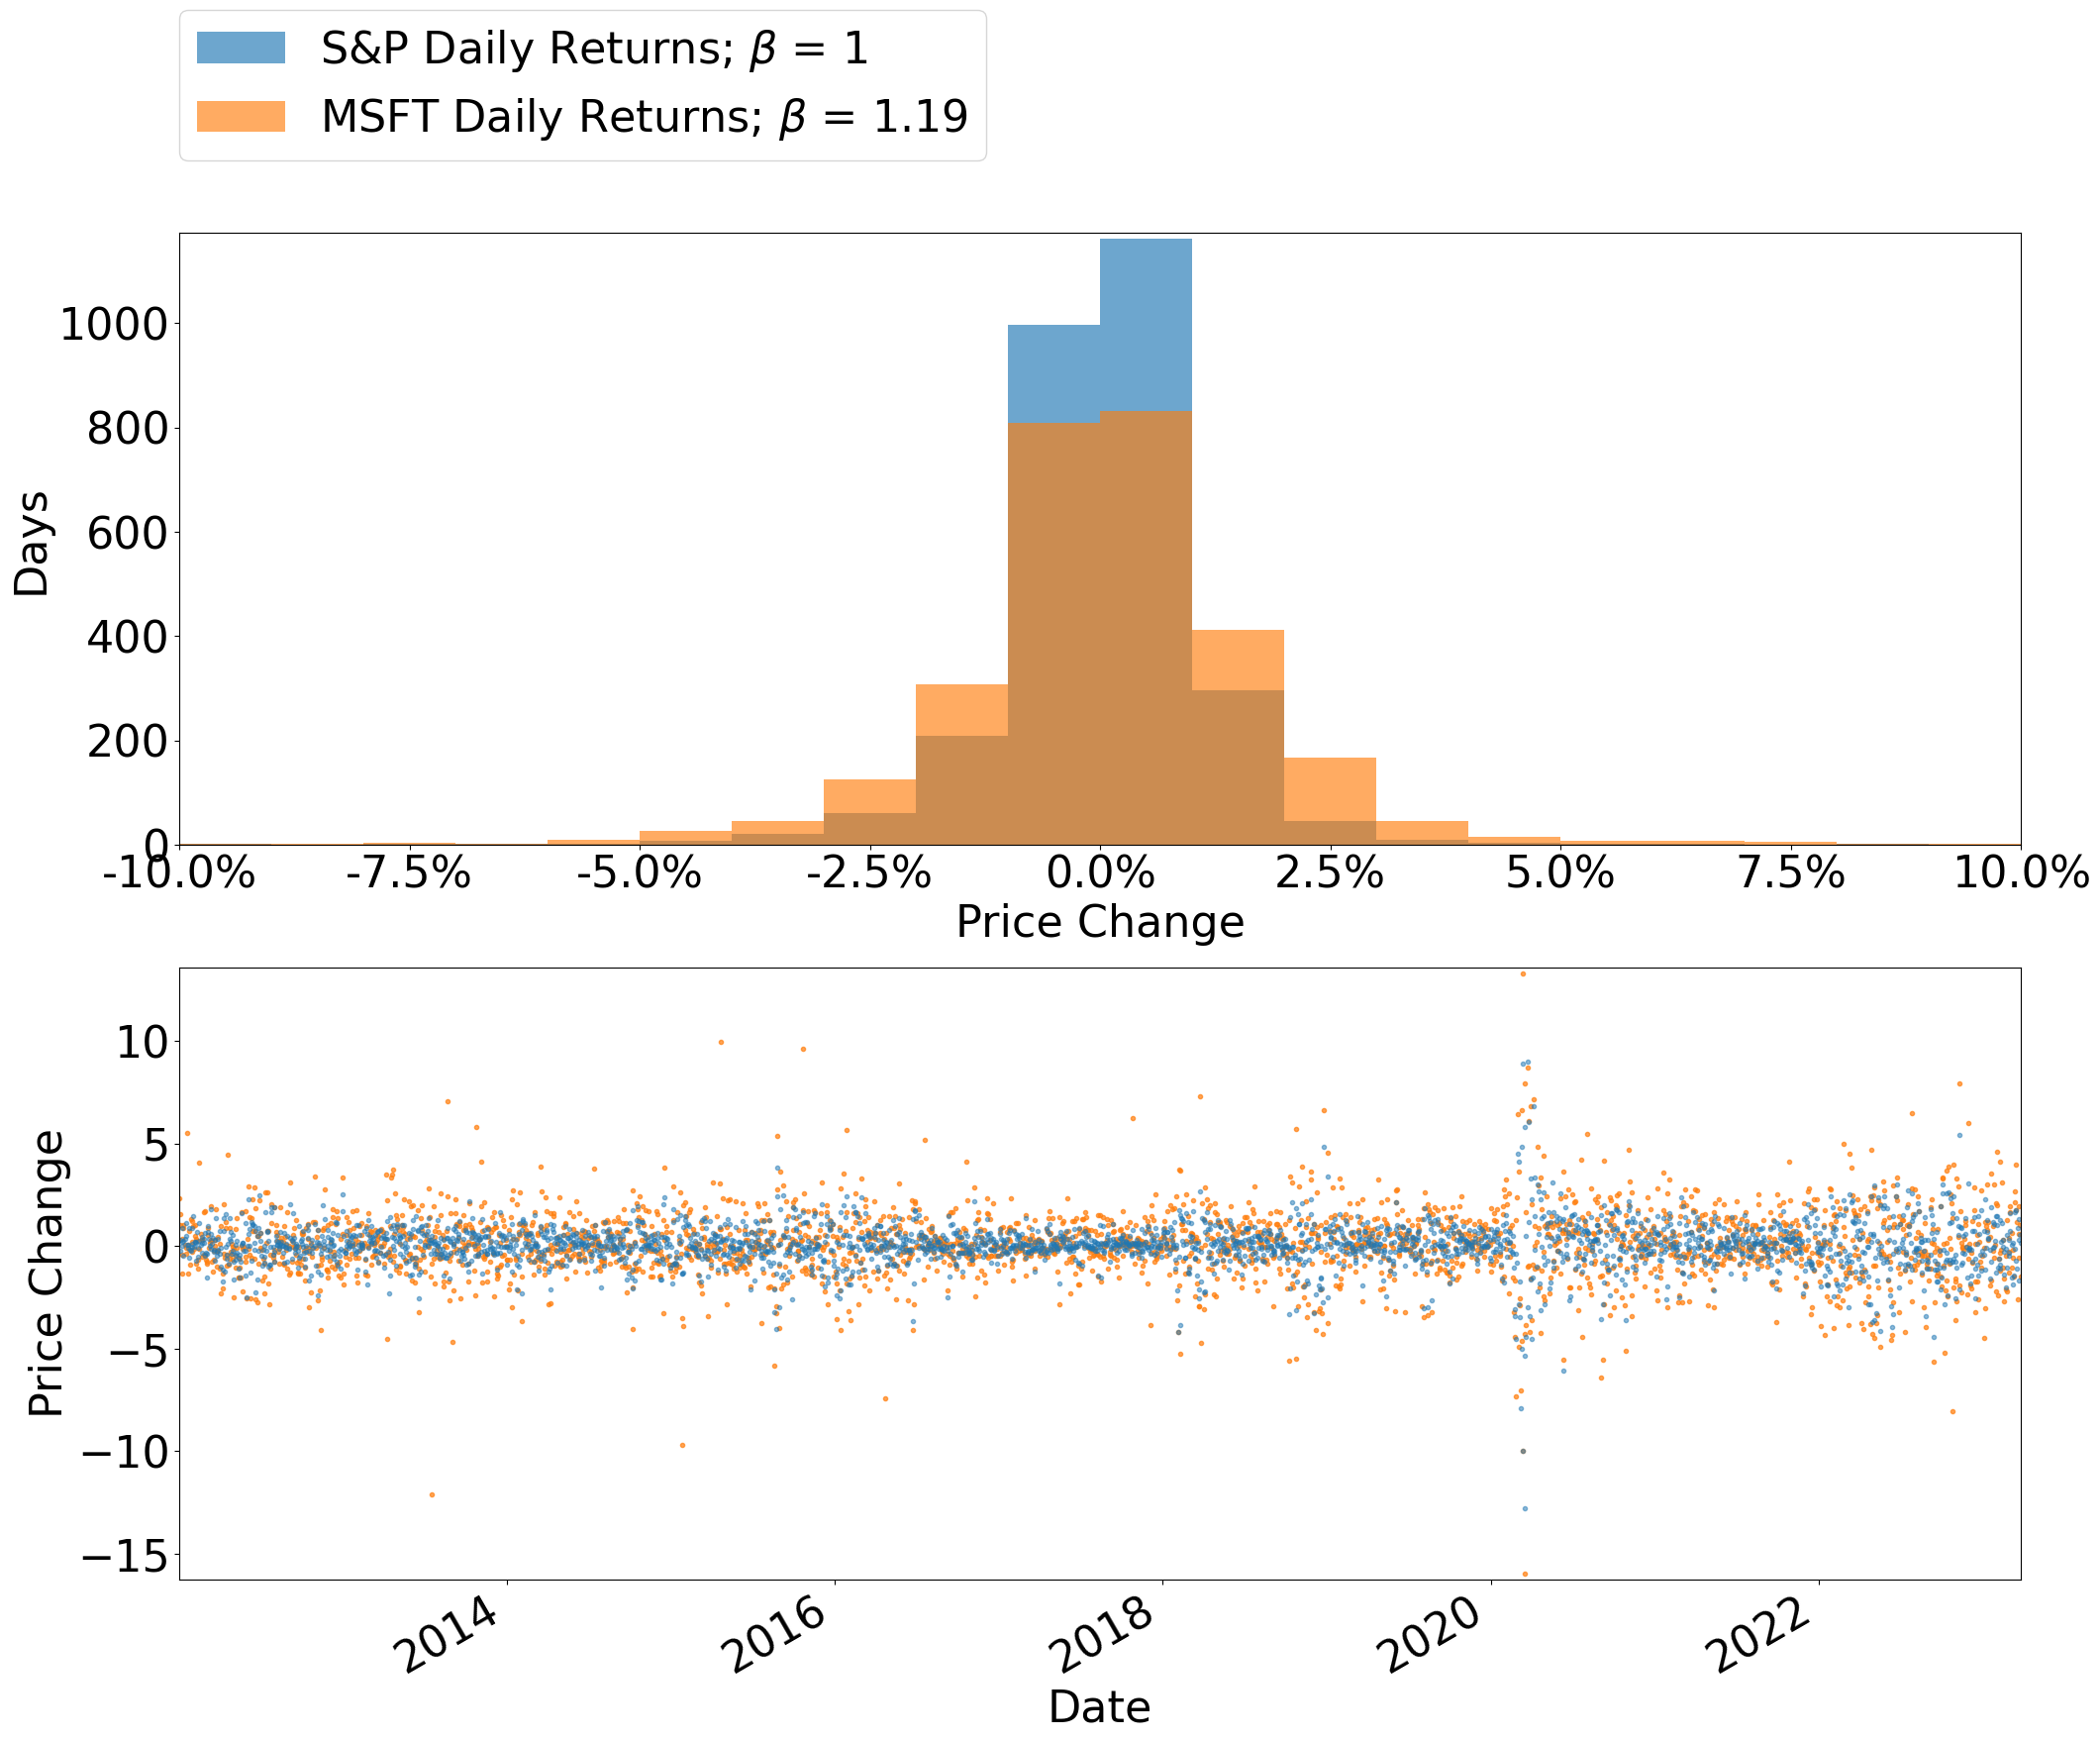

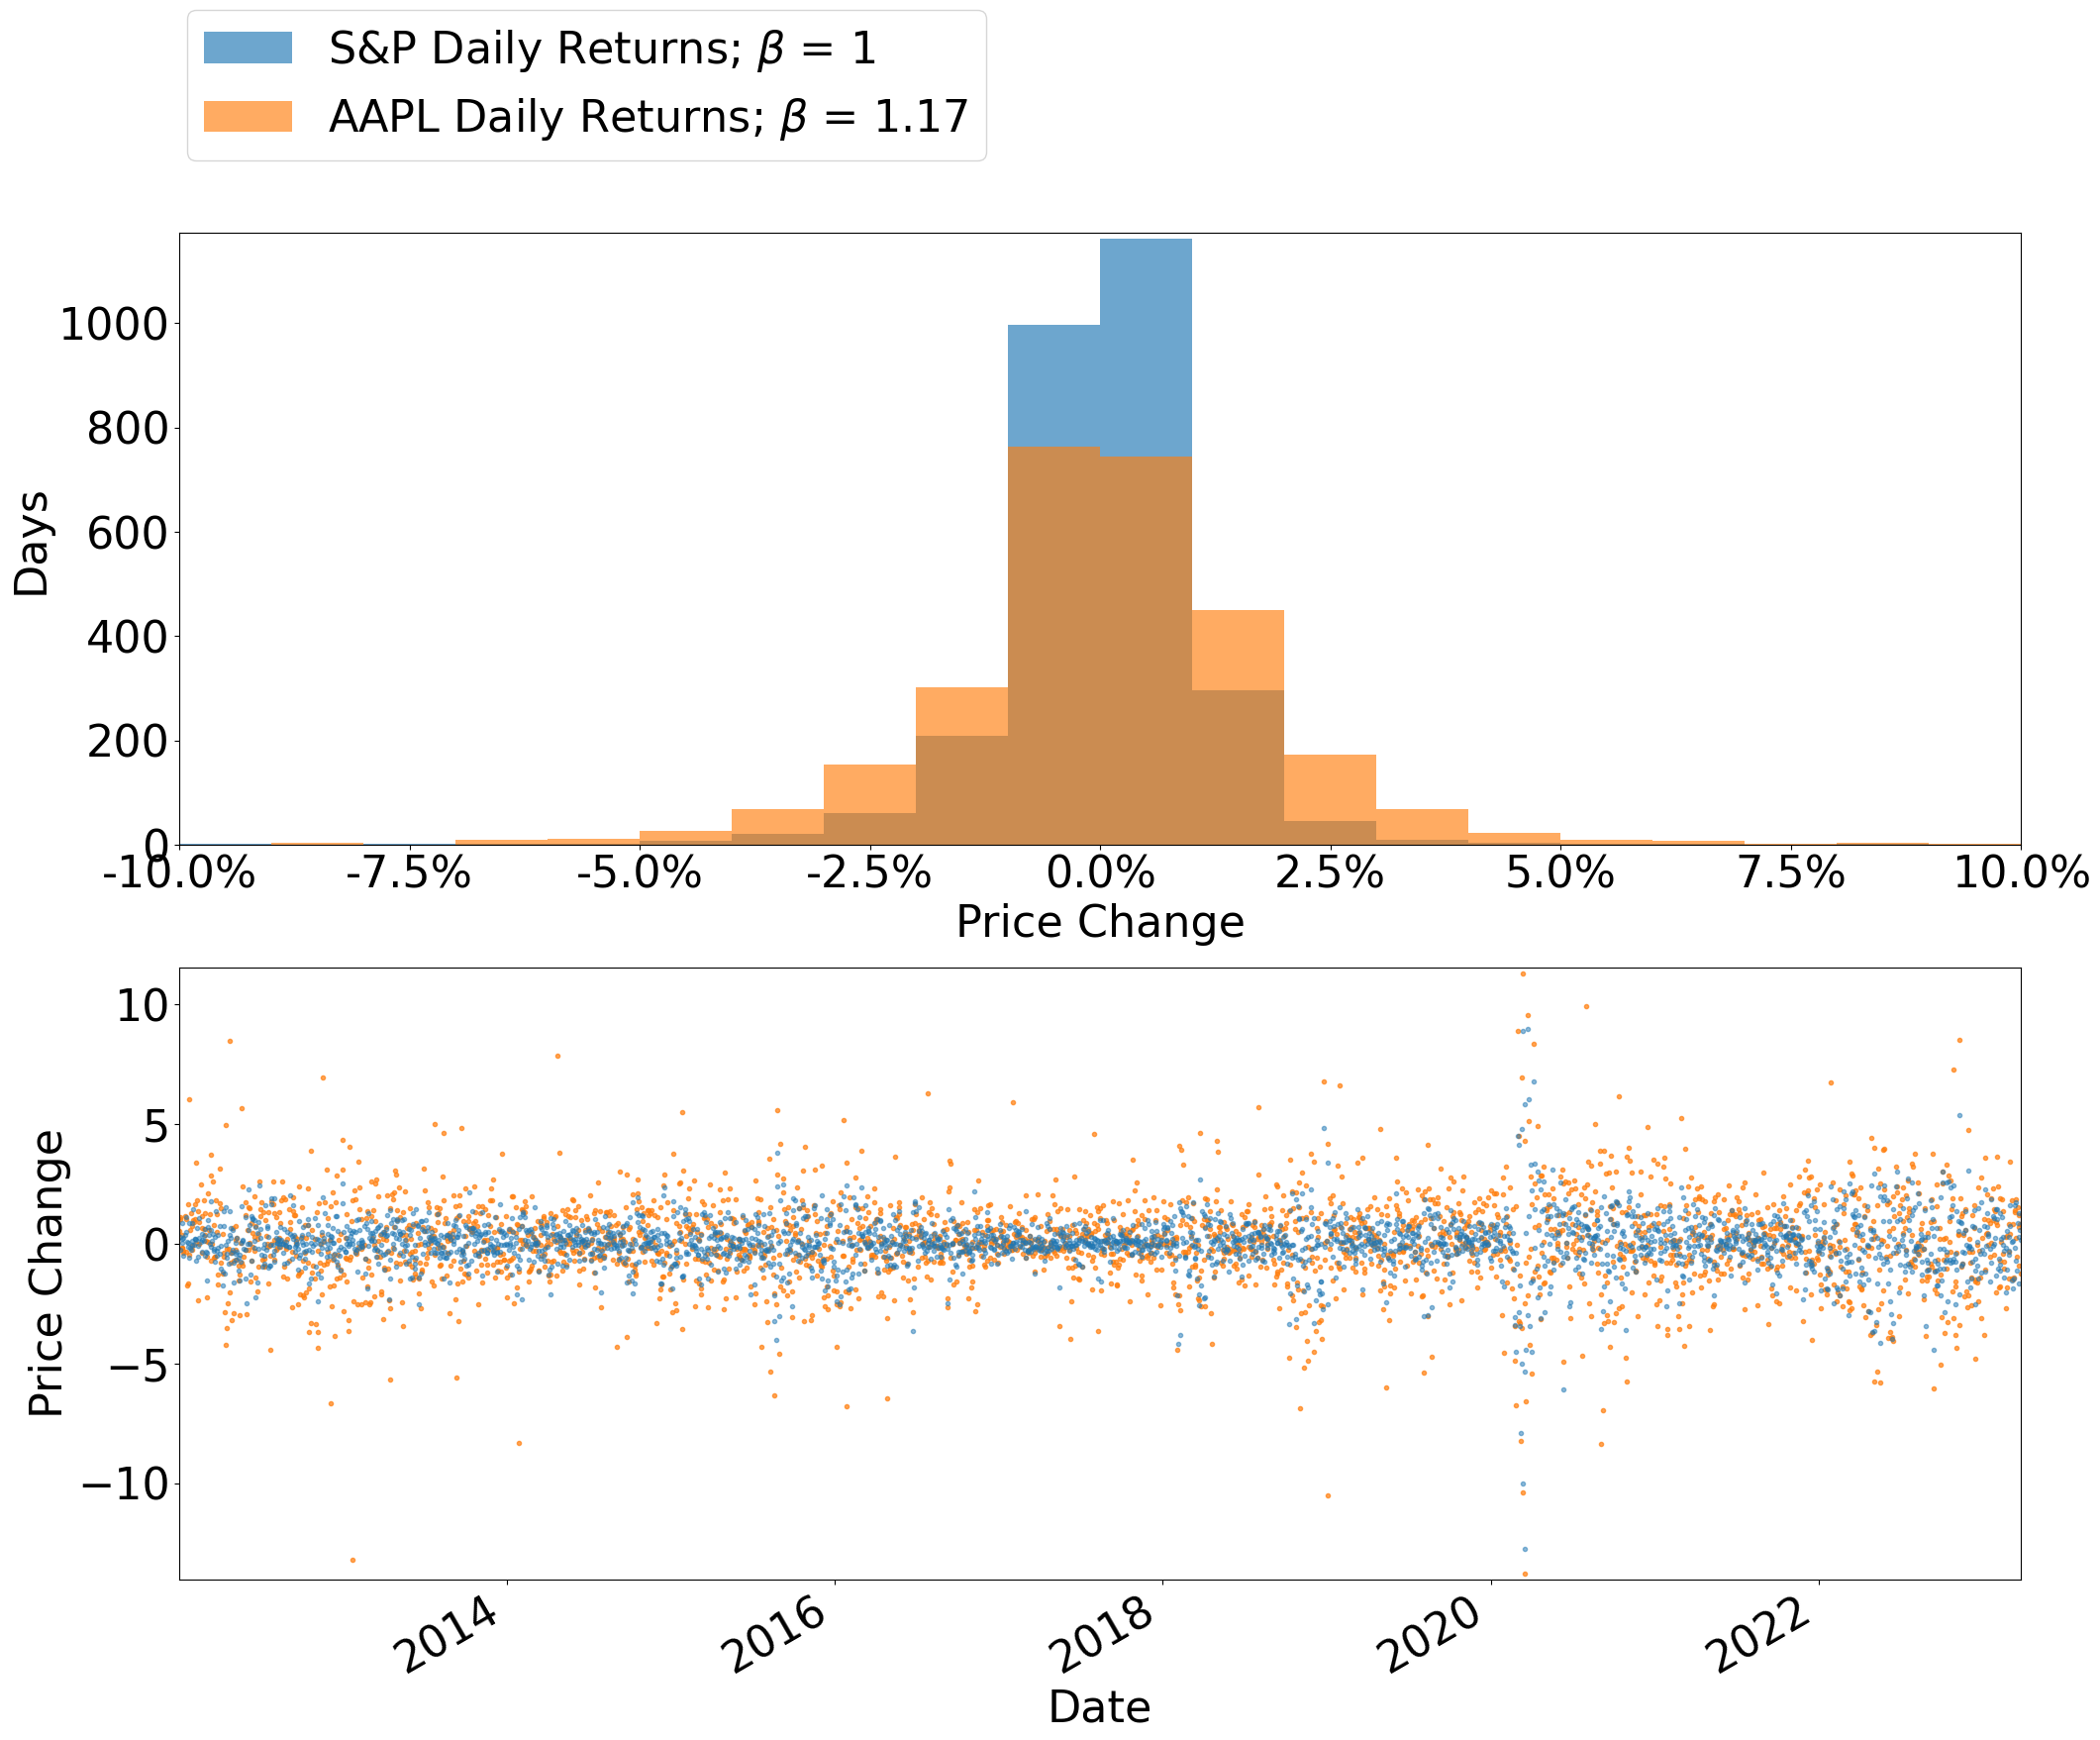

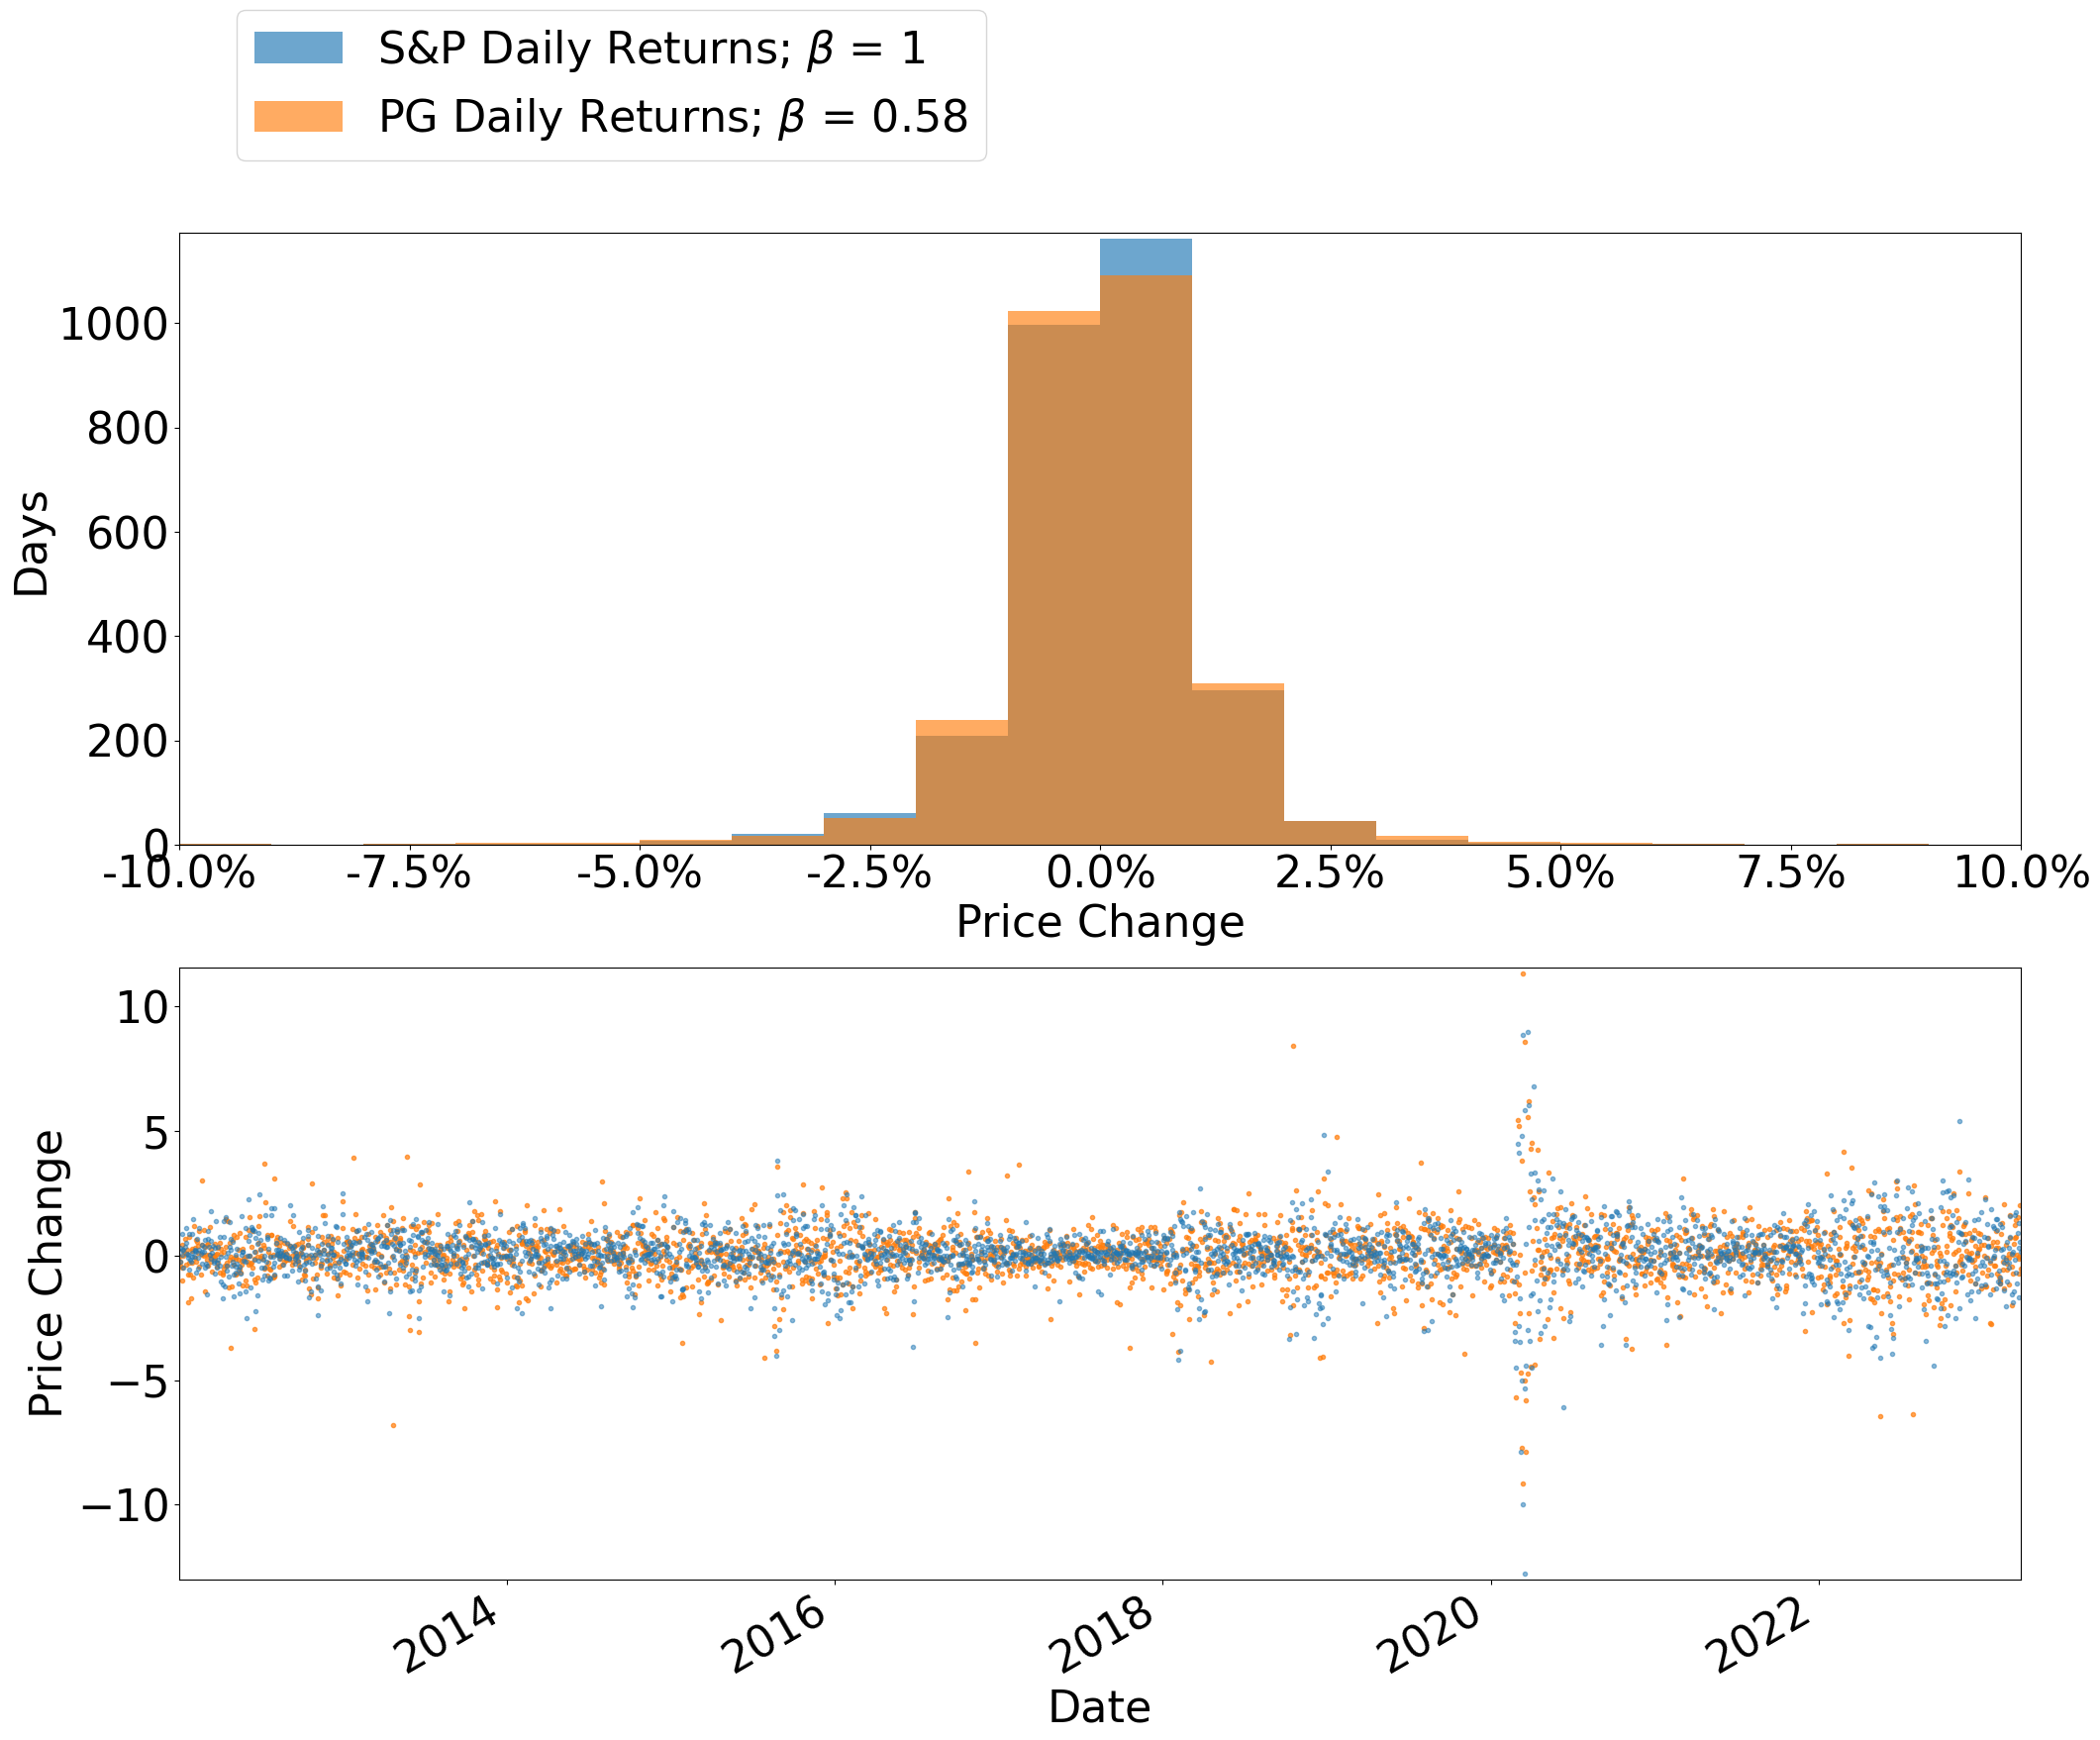

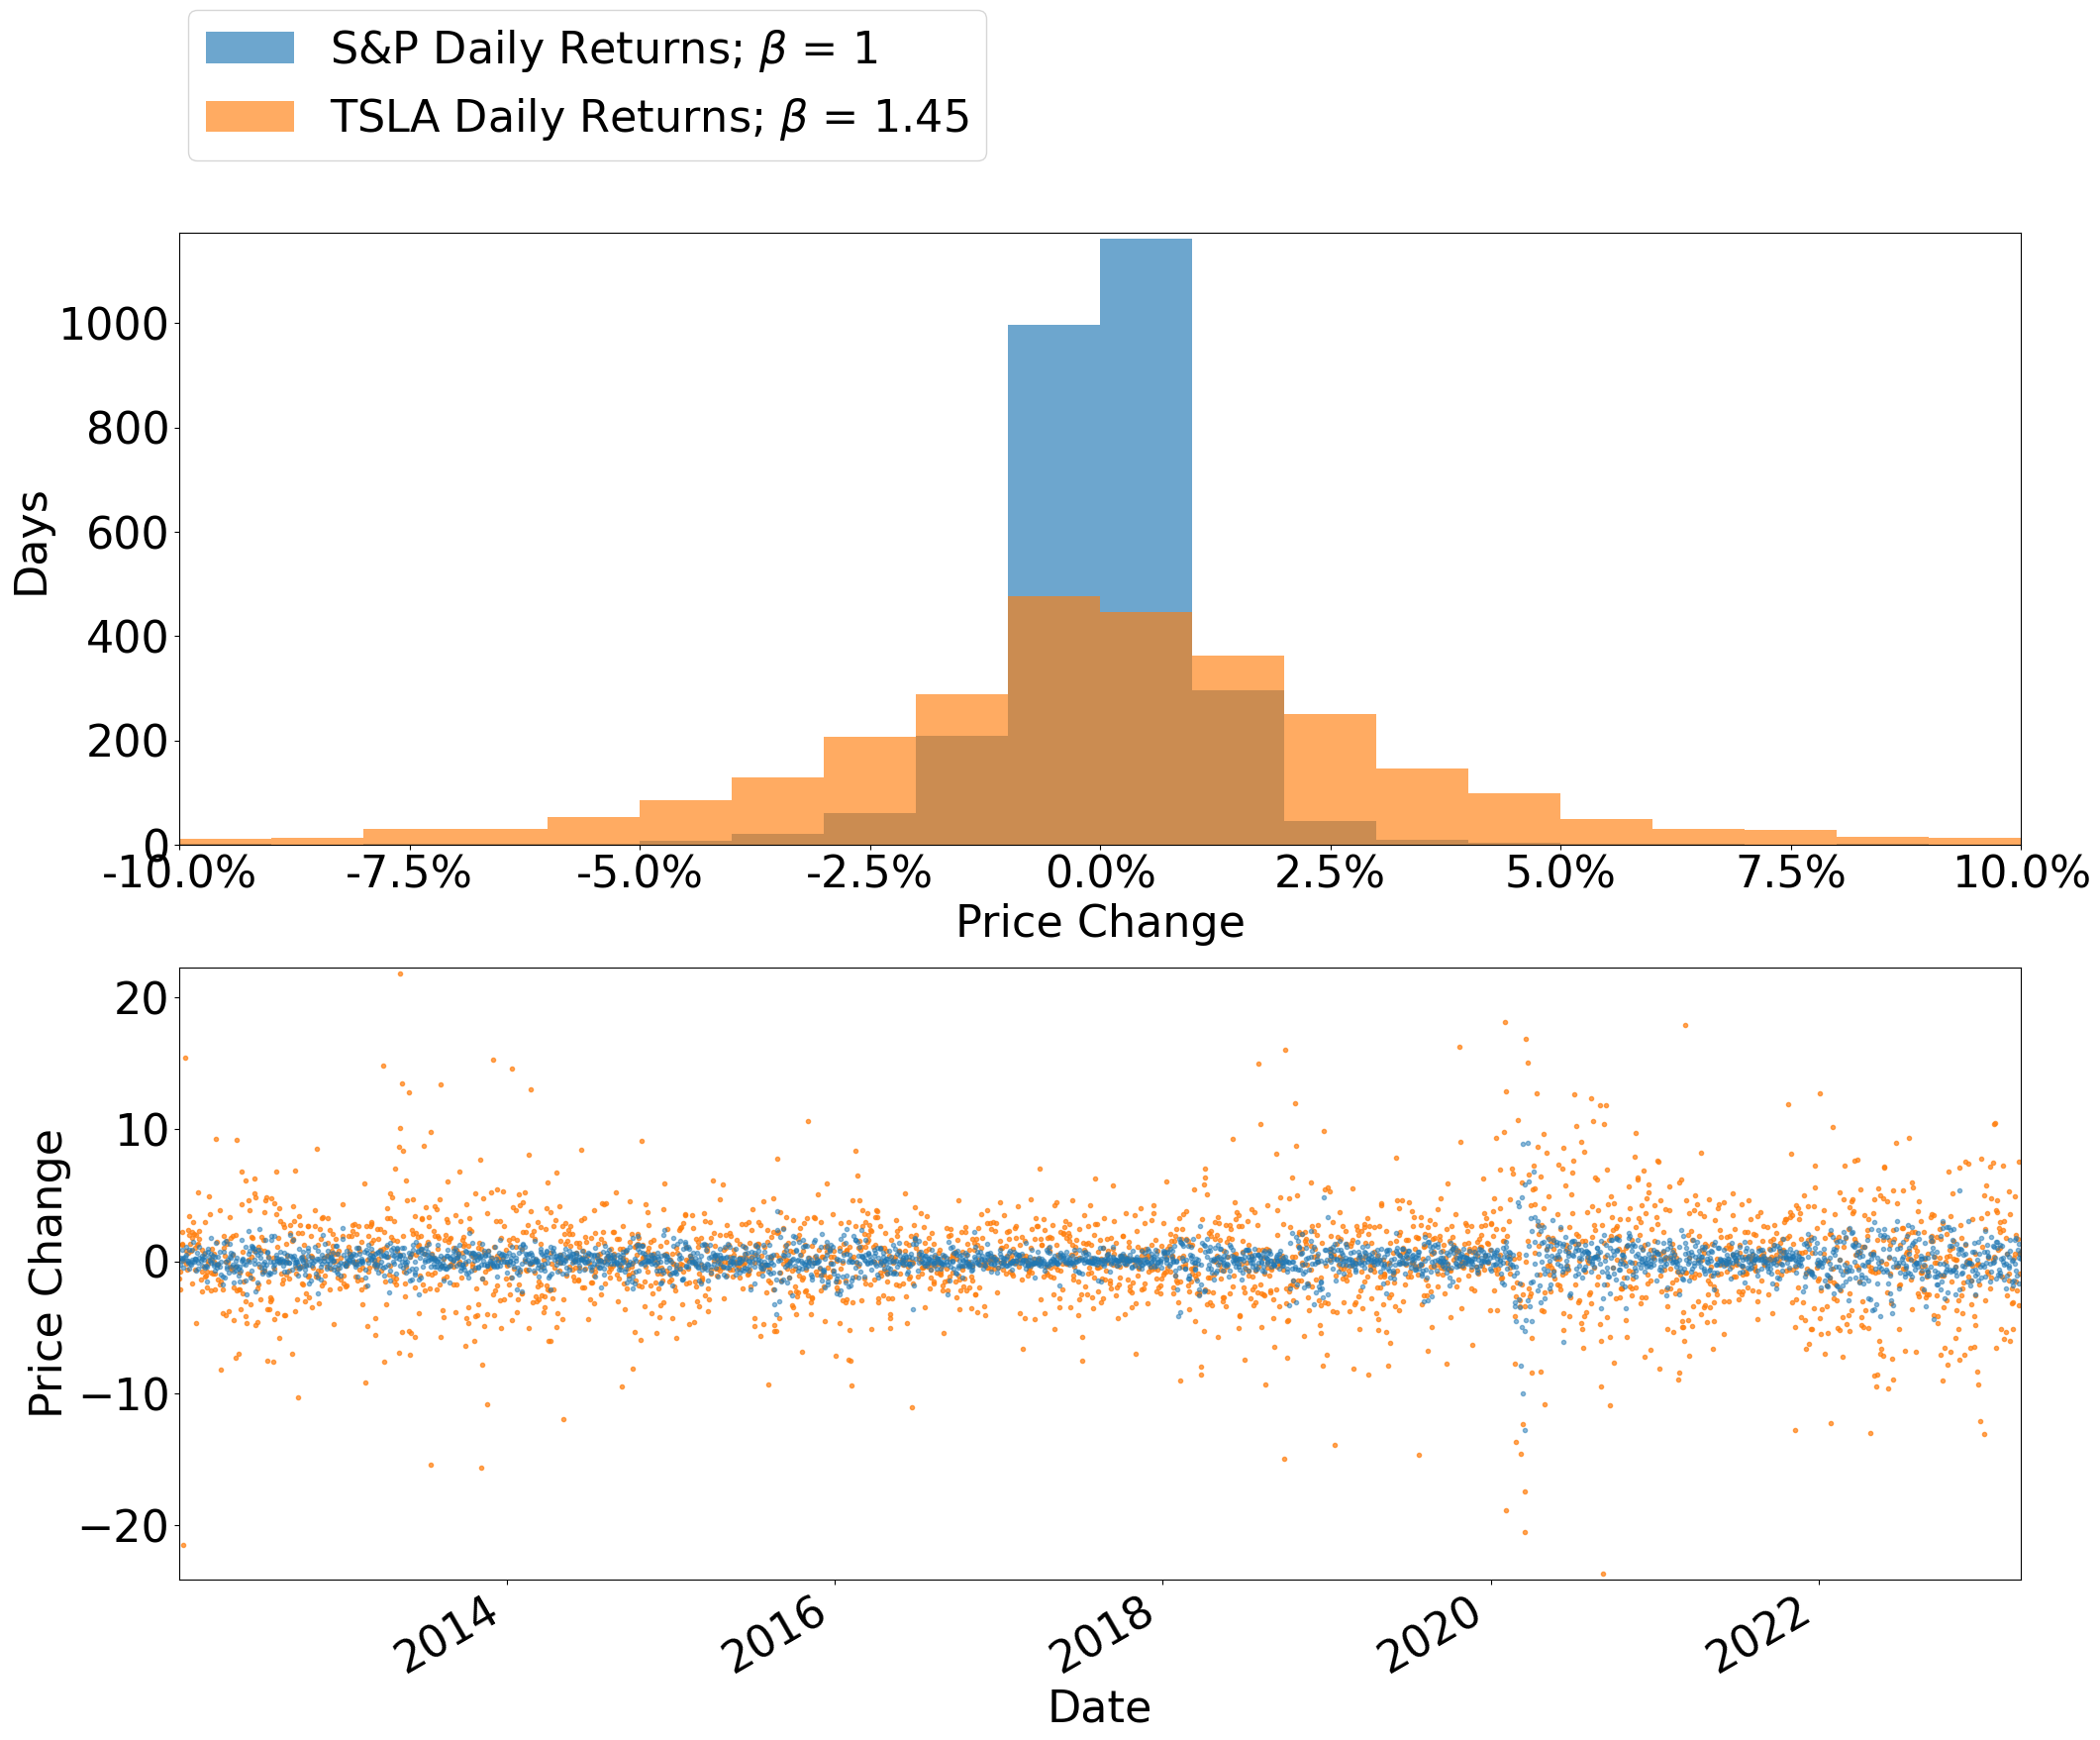

In [38]:
plot_data = price_change_data.mul(100)
for stock in stocks:
    fig, ax = plt.subplots(2, 1, figsize = (24,20))
    plot_data["S&P500"].hist(bins = [x for x in range(-10, 11, 1)],
                                    label = "S&P Daily Returns; $\\beta$ = " + str(1),
                                    ax = ax[0],
                                    density = False,
                                    alpha = 0.65)
    
    plot_data[stock].hist(bins = [x for x in range(-10, 11, 1)],
                                    label = stock + " Daily Returns; $\\beta$ = " + str(betas[stock].round(2)),
                                    ax = ax[0],
                                    density = False,
                                    alpha = 0.65)
    ax[0].grid(False)
    ax[0].legend(bbox_to_anchor = (0.45,1.4))
    ax[0].set_ylabel("Days")
    ax[0].set_xlabel("Price Change")
    ax[1].set_ylabel("Price Change")
    ax[0].set_xticklabels([str(x) + "%" for x in ax[0].get_xticks()])
    
    plot_data[stock].plot(linestyle = '',
                  marker='o',
                  alpha=.7,
                  markersize=3,
                  label= stock + " Weekly Returns",
                  c="C1",
                ax = ax[1])
    plot_data["S&P500"].plot(linestyle='',
                  marker='o',
                  alpha=.5,
                  markersize=3,
                  label= "S&P500 Weekly Returns",
                  c="C0",
                ax = ax[1])

In [39]:
n = 100
m = 1000

dist_avgs = {"Die Rolls":[],
             "Poisson":[],
             "Lognormal":[]}

for i in range(m):
    dist_avgs["Die Rolls"].append(np.average(np.random.randint(1,7,n)))
    dist_avgs["Poisson"].append(np.average(np.random.poisson(1,n)))
    dist_avgs["Lognormal"].append(np.average(np.random.lognormal(0,1,n)))

dist_avgs = pd.DataFrame(dist_avgs)
dist_avgs

Die Rolls  Poisson  Lognormal
0         3.39     0.97   1.997322
1         3.53     0.85   1.617034
2         3.47     1.09   1.561087
3         3.26     0.97   1.560131
4         3.77     0.91   1.372292
..         ...      ...        ...
995       3.37     1.03   1.935144
996       3.61     1.04   1.152566
997       3.29     0.99   1.555244
998       3.62     1.12   1.425621
999       3.43     0.98   2.115242

[1000 rows x 3 columns]

Text(0.5, 1.0, 'Non-Centered Distributions')

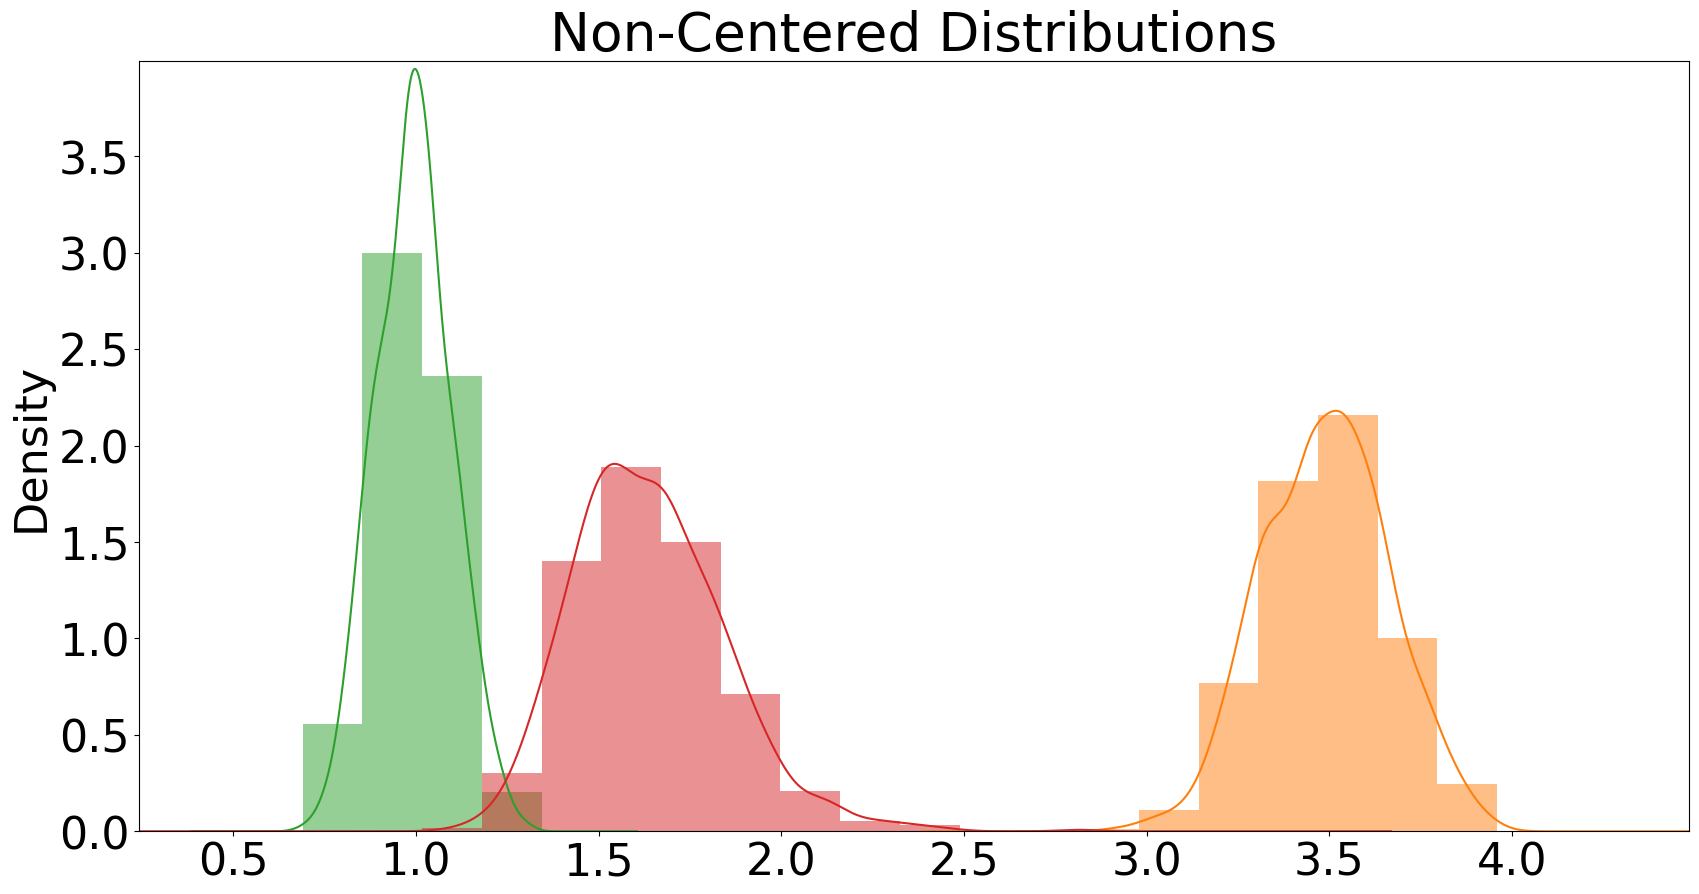

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))

# first, plot the dataframe containing the distributions of the random sample means 
dist_avgs.plot.hist(density=True,
                    ax=ax,
                    bins=20,
                    color=["C1", "C2", "C3"],
                    alpha=.5,
                   legend = False)
dist_avgs.plot.kde(ax=ax, color=["C1", "C2", "C3"], legend=False)
ax.set_title("Non-Centered Distributions")

In [41]:
means_df = pd.DataFrame()
sd_df = pd.DataFrame()

for key in dist_avgs:
    means_df[key] = dist_avgs[key] - dist_avgs.mean()[key]
    sd_df[key] = means_df[key] / means_df.std()[key]
sd_df

Die Rolls   Poisson  Lognormal
0    -0.580064 -0.239135   1.718334
1     0.226781 -1.401865  -0.104979
2    -0.119010  0.923595  -0.373219
3    -1.329277 -0.239135  -0.377802
4     1.609944 -0.820500  -1.278407
..         ...       ...        ...
995  -0.695327  0.342230   1.420219
996   0.687835  0.439124  -2.331896
997  -1.156382 -0.045346  -0.401231
998   0.745467  1.214278  -1.022717
999  -0.349537 -0.142241   2.283709

[1000 rows x 3 columns]

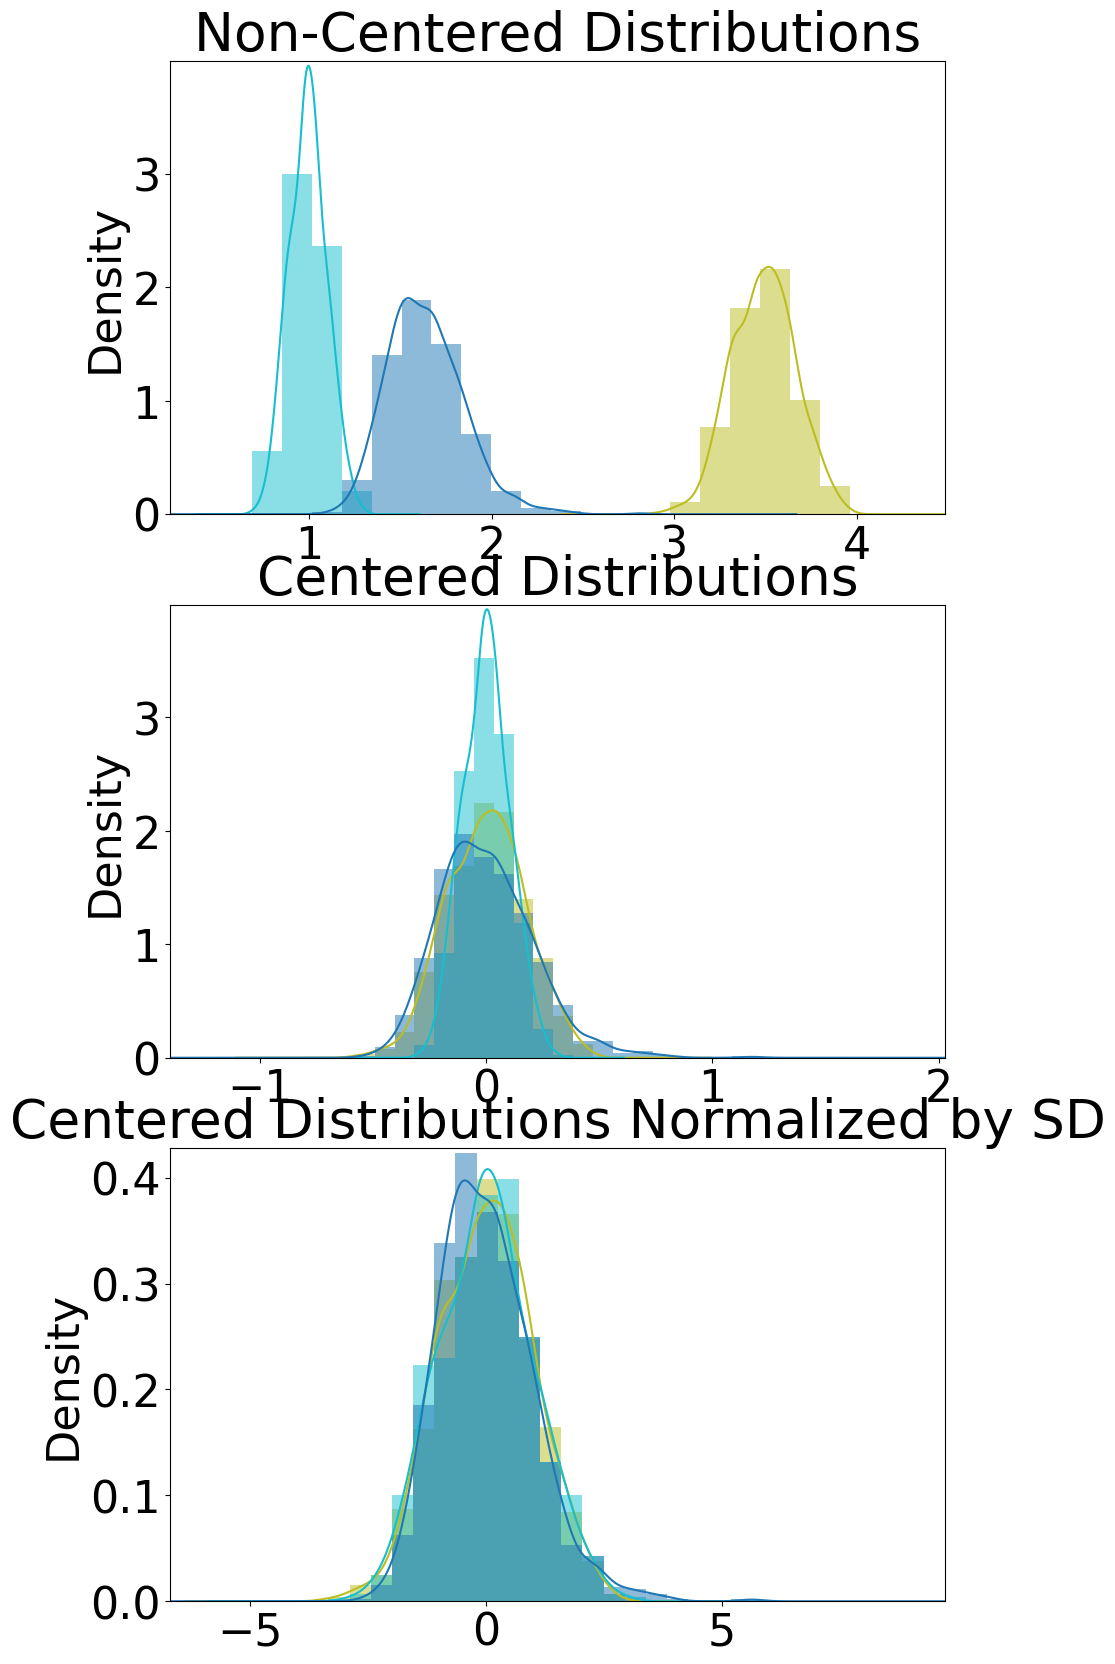

In [52]:
# save dfs in a single dictionary
df_dct = {"Non-Centered Distributions":dist_avgs,
         "Centered Distributions":means_df,
         "Centered Distributions Normalized by SD":sd_df}

keys = list(df_dct.keys())
fig, axs = plt.subplots(3, figsize=(10, 20))
for i in range(len(keys)):
    key = keys[i]
    ax = axs[i]
    plot_df = df_dct[key]
    num_samples = len(plot_df.keys())
    colors = ["C" + str(c + 168) for c in range(num_samples)]
    plot_df.plot.hist(density=True,
                    ax=ax,
                    bins=20,
                    color=colors,
                    alpha=.5,
                   legend = False)
    plot_df.plot.kde(ax=ax, color=colors, legend=False)
    ax.set_title(key)


### Simulations

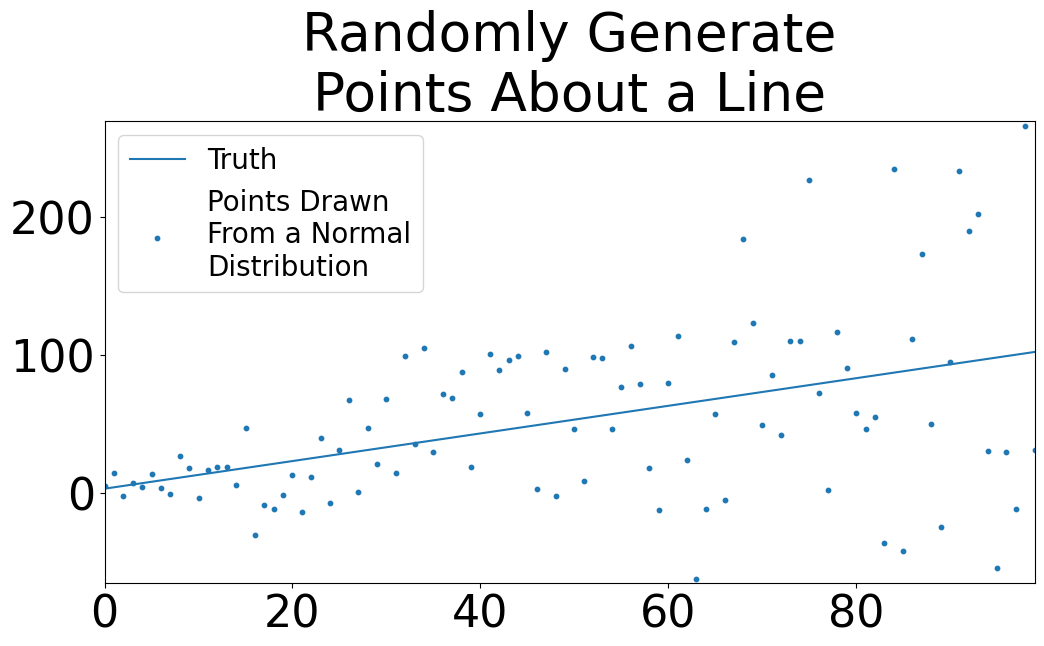

In [67]:
import random
points  = []

#heteroskedasticity
line = np.array([i+3 for i in range(100)])
for point in line:
    points.append(random.normalvariate(point, point))
figure = plt.figure(figsize = (12, 6))
plt.plot(line, label = "Truth")
plt.scatter(np.arange(len(points)), points,label = "Points Drawn\nFrom a Normal\nDistribution", s = 10)
plt.title("Randomly Generate\nPoints About a Line")
plt.legend(loc = "best", fontsize = 20)
plt.show()

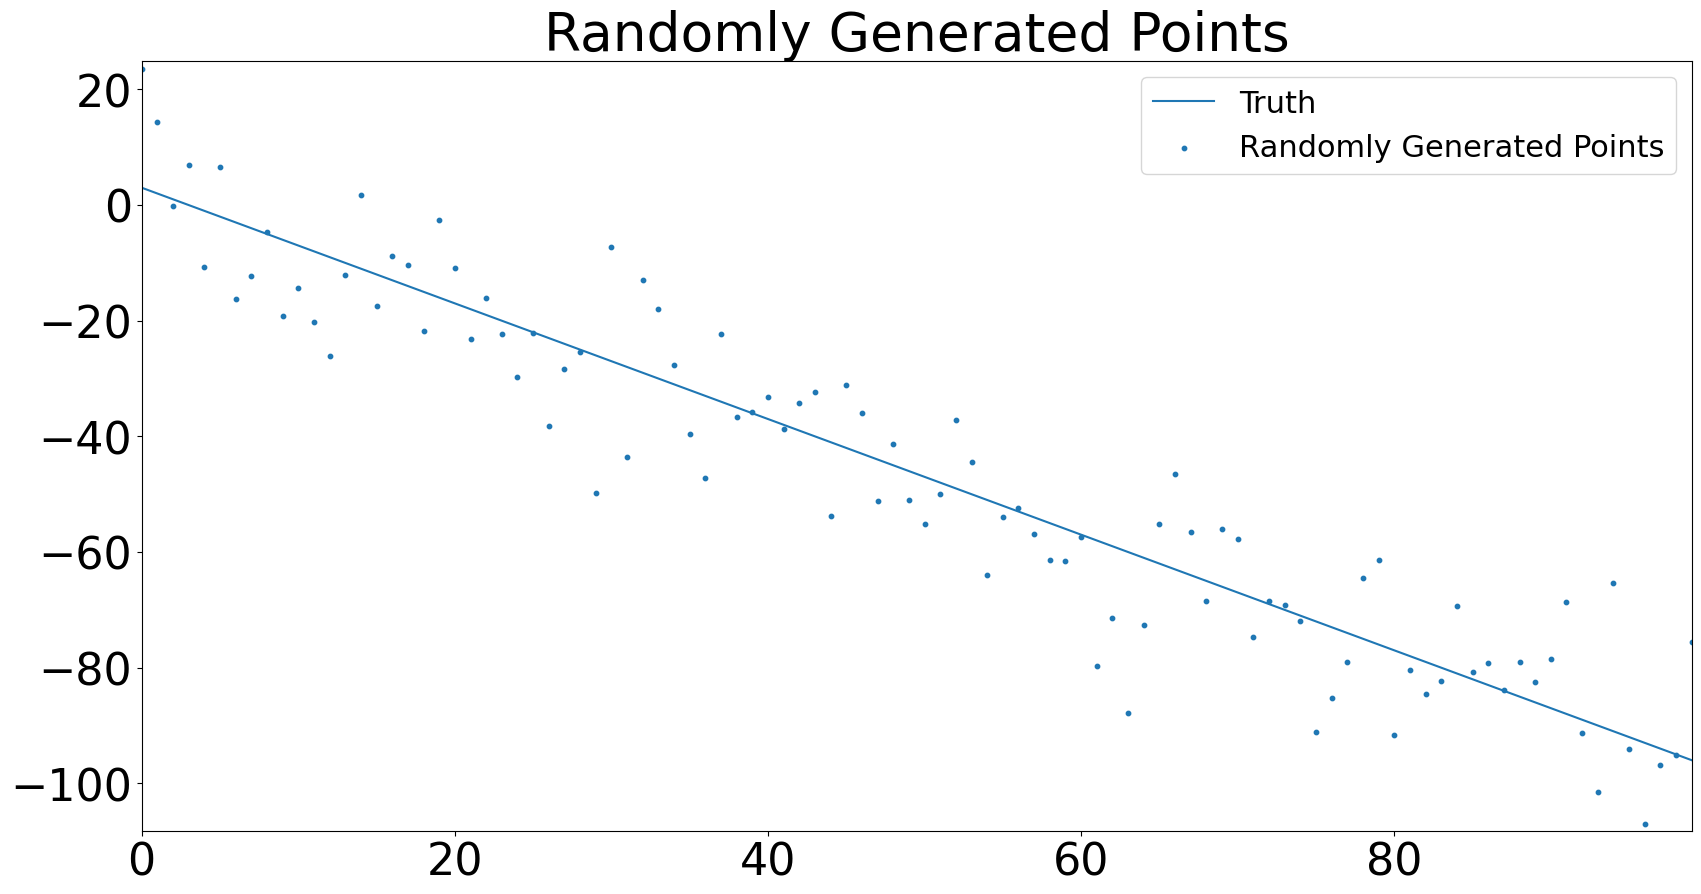

In [70]:
def build_random_data_with_line(y_int, slope, SD = 1):
    line = np.array([slope * i + y_int for i in range(100)])
    points = []
    for point in line:
        points.append(random.normalvariate(point, SD))
    return line, points
def plot_line(line, points, line_name = "Truth", title = "Randomly Generated Points"):
    figure = plt.figure(figsize = (20,10))
    plt.plot(line, label = line_name)
    plt.scatter(np.arange(len(points)), points, s = 10, label = title)
    plt.title(title)
    plt.legend(loc = "best", fontsize = 22)
    plt.show()
line, points = build_random_data_with_line(y_int = 3, slope = -1, SD = 10)
plot_line(line, points)

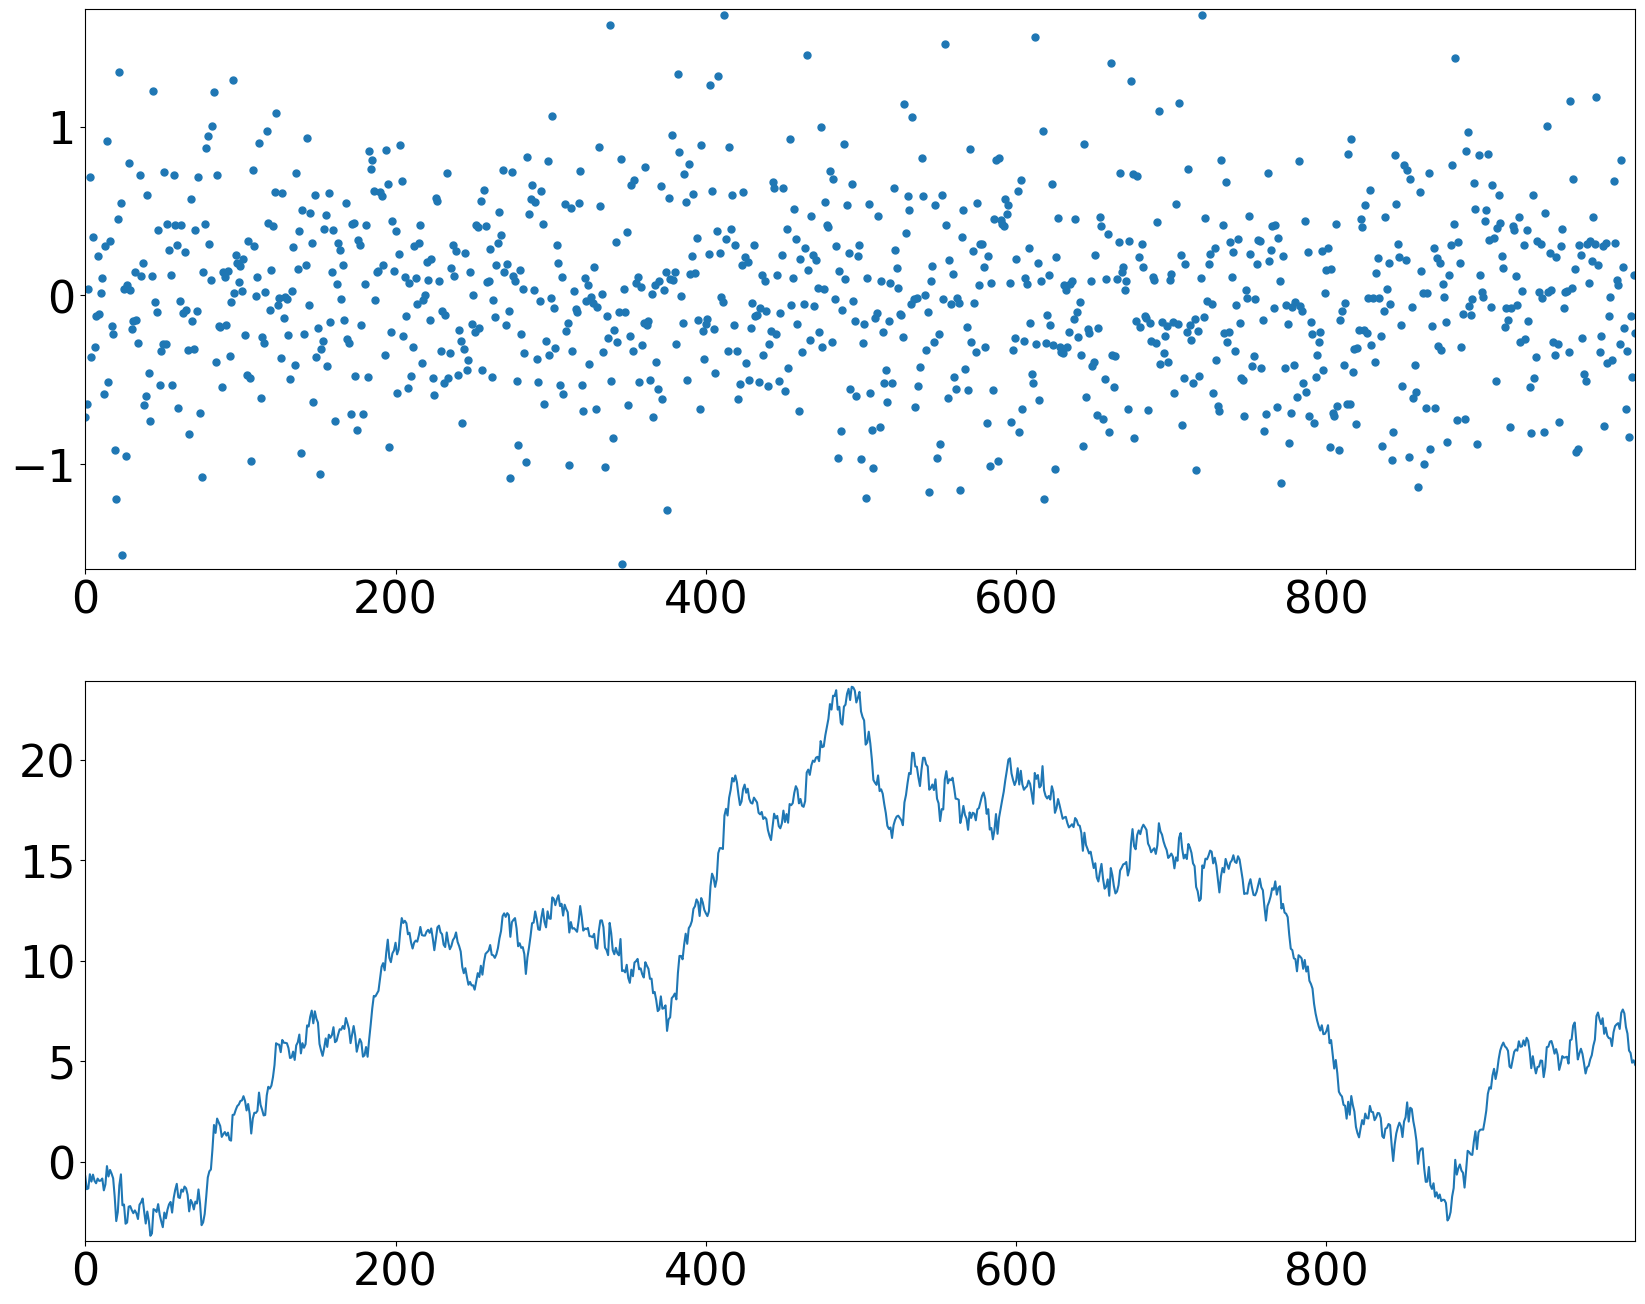

In [76]:
random_list = [random.normalvariate(0, 0.5) for i in range(1000)]
fig, axs = plt.subplots(2, figsize = (20,16))
axs[0].plot(random_list, ls="", marker = ".", ms = 10)

simulation = []
for i in range(len(random_list)):
    val = random_list[i]
    if i == 0:
        simulation.append(val)
    else:
        simulation.append(simulation[-1] + val)
axs[1].plot(simulation)
plt.show()
plt.close()